# Frontal Detection Analysis (front crossing rates)

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from matplotlib import cm
import matplotlib as mpl
import cartopy.feature as cfeature

In [3]:
from matplotlib.dates import DateFormatter
import nc_time_axis

## Function to calculate seasonal rate climatologies

In [4]:
# function for calculating seasonal climatological rates over CONUS (spatial field, spatial mean, spatial stdev)
def srates_clim_CONUS(path, file, grid):

    # read in files
    rates_fronts = xr.open_dataset(path+file)
    
    # process seasonal rate climatology and standard deviation
    srates_clim = rates_fronts.seasonal_rate_climatology
    srates_clim_stdev = rates_fronts.seasonal_rate_climatology_stdev
    
    # check gridtype
    # approx. lat/lon here to get a CONUS rectangular region - may not exactly match Jim's analysis
    if grid=="CESM":
        srates_clim_CONUS = srates_clim.sel(lat=slice(26,50), lon=slice(235,292)) # CESM grid lons
        srates_clim_stdev_CONUS = srates_clim_stdev.sel(lat=slice(26,50), lon=slice(235,292))
    elif grid=="MERRA":
        srates_clim_CONUS = srates_clim.sel(lat=slice(26,50), lon=slice(-125, -68)) # MERRA2 grid lons for rates calculated via polylines
        srates_clim_stdev_CONUS = srates_clim_stdev.sel(lat=slice(26,50), lon=slice(-125, -68))
    
    # average over CONUS
    weights = np.cos(np.deg2rad(srates_clim_CONUS.lat))
    weights.name = "weights"
    srates_clim_CONUS_weighted = srates_clim_CONUS.weighted(weights)
    srates_clim_CONUS_weighted_mean = srates_clim_CONUS_weighted.mean(("lon","lat"))
    srates_clim_stdev_CONUS_weighted = srates_clim_stdev_CONUS.weighted(weights)
    srates_clim_stdev_CONUS_weighted_mean = srates_clim_stdev_CONUS_weighted.mean(("lon","lat"))
    
    return(srates_clim_CONUS, srates_clim_stdev_CONUS, srates_clim_CONUS_weighted_mean, srates_clim_stdev_CONUS_weighted_mean)

## Function to calculate monthly rate climatologies

In [5]:
# function for calculating seasonal climatological rates over CONUS (spatial field, spatial mean, spatial stdev)
def mrates_clim_CONUS(path, file, grid):

    # read in files
    rates_fronts = xr.open_dataset(path+file)
    
    # process seasonal rate climatology and standard deviation
    mrates_clim = rates_fronts.monthly_rate_climatology
    mrates_clim_stdev = rates_fronts.monthly_rate_climatology_stdev
    
    # check gridtype
    # approx. lat/lon here to get a CONUS rectangular region - may not exactly match Jim's analysis
    if grid=="CESM":
        mrates_clim_CONUS = mrates_clim.sel(lat=slice(26,50), lon=slice(235,292)) # CESM grid lons
        mrates_clim_stdev_CONUS = mrates_clim_stdev.sel(lat=slice(26,50), lon=slice(235,292))
    elif grid=="MERRA":
        mrates_clim_CONUS = mrates_clim.sel(lat=slice(26,50), lon=slice(-125, -68)) # MERRA2 grid lons for rates calculated via polylines
        mrates_clim_stdev_CONUS = mrates_clim_stdev.sel(lat=slice(26,50), lon=slice(-125, -68))
    
    # average over CONUS
    weights = np.cos(np.deg2rad(mrates_clim_CONUS.lat))
    weights.name = "weights"
    mrates_clim_CONUS_weighted = mrates_clim_CONUS.weighted(weights)
    mrates_clim_CONUS_weighted_mean = mrates_clim_CONUS_weighted.mean(("lon","lat"))
    mrates_clim_stdev_CONUS_weighted = mrates_clim_stdev_CONUS.weighted(weights)
    mrates_clim_stdev_CONUS_weighted_mean = mrates_clim_stdev_CONUS_weighted.mean(("lon","lat"))
    
    return(mrates_clim_CONUS, mrates_clim_stdev_CONUS, mrates_clim_CONUS_weighted_mean, mrates_clim_stdev_CONUS_weighted_mean)

## Reading in front files and calculating climatologies

### Coded Surface Bulletin

In [6]:
csb_filepath = "/glade/work/kdagon/ML-extremes/data/CODSUS/MERRA2/"
csb_masked_rates_file = "codsus_masked_frontRates_2003-2015.nc" # masked to compare with Jim's analysis
csb_masked_srates_clim_CONUS, csb_masked_srates_clim_stdev_CONUS, csb_masked_srates_clim_CONUS_mean, csb_masked_srates_clim_stdev_CONUS_mean = srates_clim_CONUS(csb_filepath, csb_masked_rates_file, "MERRA")
csb_masked_mrates_clim_CONUS, csb_masked_mrates_clim_stdev_CONUS, csb_masked_mrates_clim_CONUS_mean, csb_masked_mrates_clim_stdev_CONUS_mean = mrates_clim_CONUS(csb_filepath, csb_masked_rates_file, "MERRA")

In [6]:
csb_masked_srates_clim_CONUS_mean[:,4]
csb_masked_mrates_clim_CONUS_mean[:,4]

<xarray.DataArray (seasons4: 4)>
array([0.32471475, 0.31300864, 0.27625354, 0.29810585])
Coordinates:
    clim_seasons  (seasons4) datetime64[ns] 2009-01-15 2009-04-15 ... 2009-10-15
    front_type    object 'all'
Dimensions without coordinates: seasons4

In [7]:
# sum across front types is not equal to "all" front type
csb_masked_srates_clim_CONUS_mean[:,:3].sum("front")
csb_masked_mrates_clim_CONUS_mean[:,:3].sum("front")

<xarray.DataArray (seasons4: 4)>
array([0.4494713 , 0.4426034 , 0.40918392, 0.41450852])
Coordinates:
    clim_seasons  (seasons4) datetime64[ns] 2009-01-15 2009-04-15 ... 2009-10-15
Dimensions without coordinates: seasons4

In [8]:
csb_masked_srates_clim_stdev_CONUS_mean[:,4]
csb_masked_mrates_clim_stdev_CONUS_mean[:,4]

<xarray.DataArray (seasons4: 4)>
array([0.06057323, 0.0554856 , 0.05437348, 0.04427692])
Coordinates:
    clim_seasons  (seasons4) datetime64[ns] 2009-01-15 2009-04-15 ... 2009-10-15
    front_type    object 'all'
Dimensions without coordinates: seasons4

In [7]:
csb_rates_file = "codsus_frontRates_2003-2015.nc" # unmasked to compare with CESM output
csb_srates_clim_CONUS, csb_srates_clim_stdev_CONUS, csb_srates_clim_CONUS_mean, csb_srates_clim_stdev_CONUS_mean = srates_clim_CONUS(csb_filepath, csb_rates_file, "MERRA")
csb_mrates_clim_CONUS, csb_mrates_clim_stdev_CONUS, csb_mrates_clim_CONUS_mean, csb_mrates_clim_stdev_CONUS_mean = mrates_clim_CONUS(csb_filepath, csb_rates_file, "MERRA")

In [ ]:
csb_srates_clim_CONUS_mean[:,4]
csb_mrates_clim_CONUS_mean[:,4]

In [10]:
csb_srates_clim_stdev_CONUS_mean[:,4]
csb_mrates_clim_stdev_CONUS_mean[:,4]

<xarray.DataArray (seasons4: 4)>
array([0.05933122, 0.05412225, 0.04911411, 0.04307559])
Coordinates:
    clim_seasons  (seasons4) datetime64[ns] 2009-01-15 2009-04-15 ... 2009-10-15
    front_type    object 'all'
Dimensions without coordinates: seasons4

### CESM

In [8]:
cesm_filepath = "/glade/work/kdagon/FrontDetector/CESMOutputs/"
#cesm_hist_rates_file = "cesm_frontRates_2000-2005.nc" # CESM historial simulation, 2000-2005
cesm_rates_file = "cesm_fronts_2003-2015_frontRates_viaPolylines_customgrid.nc" # rates calculated via polyline analysis (to better compare to Jim's analysis)

cesm_srates_clim_CONUS, cesm_srates_clim_stdev_CONUS, cesm_srates_clim_CONUS_mean, cesm_srates_clim_stdev_CONUS_mean = srates_clim_CONUS(cesm_filepath, cesm_rates_file, "MERRA")
#cesm_srates_clim_CONUS_mean[:,4]
cesm_mrates_clim_CONUS, cesm_mrates_clim_stdev_CONUS, cesm_mrates_clim_CONUS_mean, cesm_mrates_clim_stdev_CONUS_mean = mrates_clim_CONUS(cesm_filepath, cesm_rates_file, "MERRA")

In [12]:
cesm_srates_clim_stdev_CONUS_mean[:,4]

<xarray.DataArray (seasons4: 4)>
array([0.04847854, 0.04715109, 0.04629582, 0.04579892])
Coordinates:
    clim_seasons  (seasons4) object 2009-01-15 00:00:00 ... 2009-10-15 00:00:00
    front_type    object 'all'
Dimensions without coordinates: seasons4

In [9]:
cesm_OH_rates_file = "cesm_frontRates_2003-2015.nc" # rates calculated via one-hot files
cesm_OH_srates_clim_CONUS, cesm_OH_srates_clim_stdev_CONUS, cesm_OH_srates_clim_CONUS_mean, cesm_OH_srates_clim_stdev_CONUS_mean = srates_clim_CONUS(cesm_filepath, cesm_OH_rates_file, "CESM")
#cesm_OH_srates_clim_CONUS_mean[:,4]

In [15]:
cesm_OH_srates_clim_stdev_CONUS_mean[:,4]

<xarray.DataArray (seasons4: 4)>
array([0.04664363, 0.04370036, 0.04110855, 0.04265401])
Coordinates:
    clim_seasons  (seasons4) object 2009-01-15 00:00:00 ... 2009-10-15 00:00:00
    front_type    object 'all'
Dimensions without coordinates: seasons4

In [10]:
# cesm rates calculated over full historical (2000-2015) period
cesm_full_rates_file = "cesm_fronts_2000-2015_frontRates_viaPolylines_customgrid.nc"
cesm_OH_full_rates_file = "cesm_frontRates_2000-2015.nc"

cesm_full_srates_clim_CONUS, cesm_full_srates_clim_stdev_CONUS, cesm_full_srates_clim_CONUS_mean, cesm_full_srates_clim_stdev_CONUS_mean = srates_clim_CONUS(cesm_filepath, cesm_full_rates_file, "MERRA")
cesm_full_mrates_clim_CONUS, cesm_full_mrates_clim_stdev_CONUS, cesm_full_mrates_clim_CONUS_mean, cesm_full_mrates_clim_stdev_CONUS_mean = mrates_clim_CONUS(cesm_filepath, cesm_full_rates_file, "MERRA")

cesm_OH_full_srates_clim_CONUS, cesm_OH_full_srates_clim_stdev_CONUS, cesm_OH_full_srates_clim_CONUS_mean, cesm_OH_full_srates_clim_stdev_CONUS_mean = srates_clim_CONUS(cesm_filepath, cesm_OH_full_rates_file, "CESM")
cesm_OH_full_mrates_clim_CONUS, cesm_OH_full_mrates_clim_stdev_CONUS, cesm_OH_full_mrates_clim_CONUS_mean, cesm_OH_full_mrates_clim_stdev_CONUS_mean = mrates_clim_CONUS(cesm_filepath, cesm_OH_full_rates_file, "CESM")

In [11]:
# cesm rates with a modified 15-year climatology to match RCP #years (2000-2014)
cesm_fullmod_rates_file = "cesm_fronts_2000-2014_frontRates_viaPolylines_customgrid.nc"
cesm_fullmod_srates_clim_CONUS, cesm_fullmod_srates_clim_stdev_CONUS, cesm_fullmod_srates_clim_CONUS_mean, cesm_fullmod_srates_clim_stdev_CONUS_mean = srates_clim_CONUS(cesm_filepath, cesm_fullmod_rates_file, "MERRA")
cesm_fullmod_mrates_clim_CONUS, cesm_fullmod_mrates_clim_stdev_CONUS, cesm_fullmod_mrates_clim_CONUS_mean, cesm_fullmod_mrates_clim_stdev_CONUS_mean = mrates_clim_CONUS(cesm_filepath, cesm_fullmod_rates_file, "MERRA")
cesm_OH_fullmod_rates_file = "cesm_frontRates_2000-2014.nc"
cesm_OH_fullmod_srates_clim_CONUS, cesm_OH_fullmod_srates_clim_stdev_CONUS, cesm_OH_fullmod_srates_clim_CONUS_mean, cesm_OH_fullmod_srates_clim_stdev_CONUS_mean = srates_clim_CONUS(cesm_filepath, cesm_OH_fullmod_rates_file, "CESM")
cesm_OH_fullmod_mrates_clim_CONUS, cesm_OH_fullmod_mrates_clim_stdev_CONUS, cesm_OH_fullmod_mrates_clim_CONUS_mean, cesm_OH_fullmod_mrates_clim_stdev_CONUS_mean = mrates_clim_CONUS(cesm_filepath, cesm_OH_fullmod_rates_file, "CESM")

In [12]:
# cesm rcp8.5 results
cesm_OH_rcp85_rates_file = "cesm_frontRates_2086-2100.nc" # generated via one-hot files
cesm_OH_rcp85_srates_clim_CONUS, cesm_OH_rcp85_srates_clim_stdev_CONUS, cesm_OH_rcp85_srates_clim_CONUS_mean, cesm_OH_rcp85_srates_clim_stdev_CONUS_mean = srates_clim_CONUS(cesm_filepath, cesm_OH_rcp85_rates_file, "CESM")
cesm_OH_rcp85_mrates_clim_CONUS, cesm_OH_rcp85_mrates_clim_stdev_CONUS, cesm_OH_rcp85_mrates_clim_CONUS_mean, cesm_OH_rcp85_mrates_clim_stdev_CONUS_mean = mrates_clim_CONUS(cesm_filepath, cesm_OH_rcp85_rates_file, "CESM")

In [13]:
# via polylines
cesm_rcp85_rates_file = "cesm_fronts_2086-2100_frontRates_viaPolylines_customgrid.nc" # generated via poylines
cesm_rcp85_srates_clim_CONUS, cesm_rcp85_srates_clim_stdev_CONUS, cesm_rcp85_srates_clim_CONUS_mean, cesm_rcp85_srates_clim_stdev_CONUS_mean = srates_clim_CONUS(cesm_filepath, cesm_rcp85_rates_file, "MERRA")
cesm_rcp85_mrates_clim_CONUS, cesm_rcp85_mrates_clim_stdev_CONUS, cesm_rcp85_mrates_clim_CONUS_mean, cesm_rcp85_mrates_clim_stdev_CONUS_mean = mrates_clim_CONUS(cesm_filepath, cesm_rcp85_rates_file, "MERRA")

### MERRA

In [14]:
merra_filepath = "/glade/work/kdagon/FrontDetector/MERRAOutputs/"
merra_rates_file = "merra_fronts_2003-2015_frontRates_viaPolylines_customgrid.nc"

merra_srates_clim_CONUS, merra_srates_clim_stdev_CONUS, merra_srates_clim_CONUS_mean, merra_srates_clim_stdev_CONUS_mean = srates_clim_CONUS(merra_filepath, merra_rates_file, "MERRA")
#merra_srates_clim_CONUS_mean[:,4]
merra_mrates_clim_CONUS, merra_mrates_clim_stdev_CONUS, merra_mrates_clim_CONUS_mean, merra_mrates_clim_stdev_CONUS_mean = mrates_clim_CONUS(merra_filepath, merra_rates_file, "MERRA")

In [17]:
merra_srates_clim_stdev_CONUS_mean[:,4]

<xarray.DataArray (seasons4: 4)>
array([0.05121827, 0.04926218, 0.04555611, 0.04129746])
Coordinates:
    clim_seasons  (seasons4) datetime64[ns] 2009-01-15 2009-04-15 ... 2009-10-15
    front_type    object 'all'
Dimensions without coordinates: seasons4

In [15]:
merra_OH_rates_file = "merra_frontRates_2003-2015.nc" # via one-hot file
merra_OH_srates_clim_CONUS, merra_OH_srates_clim_stdev_CONUS, merra_OH_srates_clim_CONUS_mean, merra_OH_srates_clim_stdev_CONUS_mean = srates_clim_CONUS(merra_filepath, merra_OH_rates_file, "CESM")
#merra_OH_srates_clim_CONUS_mean[:,4]

In [20]:
merra_OH_srates_clim_stdev_CONUS_mean[:,4]

<xarray.DataArray (seasons4: 4)>
array([0.04978789, 0.04618768, 0.04048906, 0.03805828])
Coordinates:
    clim_seasons  (seasons4) datetime64[ns] 2009-01-15 2009-04-15 ... 2009-10-15
    front_type    object 'all'
Dimensions without coordinates: seasons4

In [16]:
merra_cesm_rates_file = "merra_cesm_fronts_2000-2015_frontRates_viaPolylines_customgrid.nc" # rates calculated via polyline analysis (to better compare to Jim's analysis)
merra_cesm_srates_clim_CONUS, merra_cesm_srates_clim_stdev_CONUS, merra_cesm_srates_clim_CONUS_mean, merra_cesm_srates_clim_stdev_CONUS_mean = srates_clim_CONUS(merra_filepath, merra_cesm_rates_file, "MERRA")
merra_cesm_mrates_clim_CONUS, merra_cesm_mrates_clim_stdev_CONUS, merra_cesm_mrates_clim_CONUS_mean, merra_cesm_mrates_clim_stdev_CONUS_mean = mrates_clim_CONUS(merra_filepath, merra_cesm_rates_file, "MERRA")

In [17]:
merra_cesm_OH_rates_file = "merra_cesm_frontRates_2000-2015.nc" # via one-hot file
merra_cesm_OH_srates_clim_CONUS, merra_cesm_OH_srates_clim_stdev_CONUS, merra_cesm_OH_srates_clim_CONUS_mean, merra_cesm_OH_srates_clim_stdev_CONUS_mean = srates_clim_CONUS(merra_filepath, merra_cesm_OH_rates_file, "CESM")
merra_cesm_OH_mrates_clim_CONUS, merra_cesm_OH_mrates_clim_stdev_CONUS, merra_cesm_OH_mrates_clim_CONUS_mean, merra_cesm_OH_mrates_clim_stdev_CONUS_mean = mrates_clim_CONUS(merra_filepath, merra_cesm_OH_rates_file, "CESM")

## Compare CSB / CESM, 2003-2015

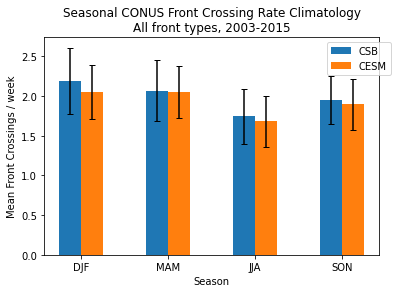

In [19]:
# seasonal rate climatologies
fig, ax = plt.subplots()

w = 0.25
labels = ['DJF', 'MAM', 'JJA', 'SON']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x - (w/2)
ax.bar(position, (csb_srates_clim_CONUS_mean*7)[:,4], yerr=(csb_srates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="CSB", color='C0', capsize=3)
position = x + (w/2)
ax.bar(position, (cesm_srates_clim_CONUS_mean*7)[:,4], yerr=(cesm_srates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="CESM", color='C1', capsize=3)

ax.set_title('Seasonal CONUS Front Crossing Rate Climatology\nAll front types, 2003-2015')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(bbox_to_anchor=(1.05, 1));
#plt.savefig('../figures/toSCP/csb_cesm_srates_clim_CONUS_mean_wk_stdev.png', bbox_inches='tight')

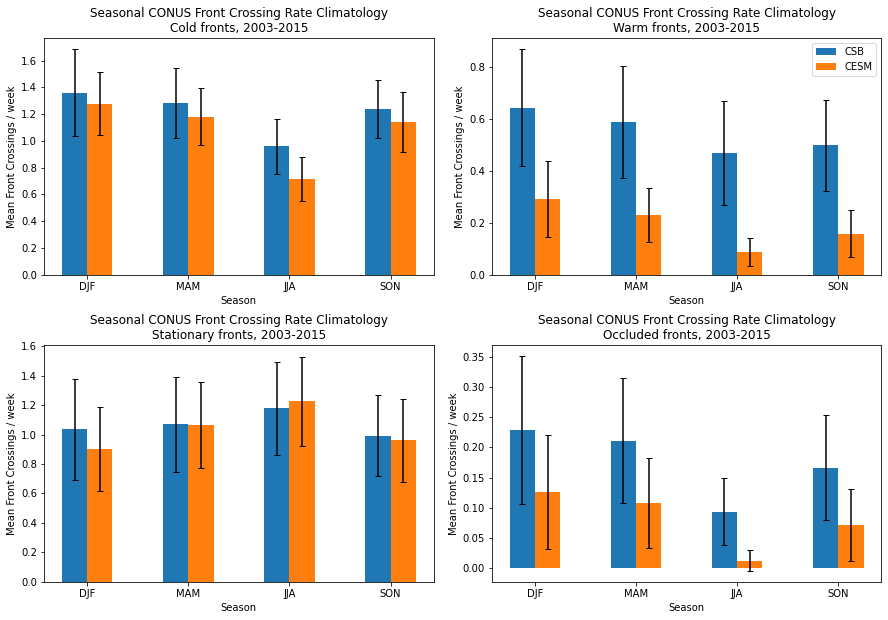

In [21]:
# by front type
frontstrings = ('Cold', 'Warm', 'Stationary', 'Occluded')
nfronts = len(frontstrings)
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax = ax.ravel()

for i in range(nfronts):
    w = 0.25
    labels = ['DJF', 'MAM', 'JJA', 'SON']
    nseason = len(labels)
    x = np.arange(nseason)  # the label locations

    position = x - (w/2)
    ax[i].bar(position, (csb_srates_clim_CONUS_mean*7)[:,i], yerr=(csb_srates_clim_stdev_CONUS_mean*7)[:,i], width=w, label="CSB", color='C0', capsize=3)
    position = x + (w/2)
    ax[i].bar(position, (cesm_srates_clim_CONUS_mean*7)[:,i], yerr=(cesm_srates_clim_stdev_CONUS_mean*7)[:,i], width=w, label="CESM", color='C1', capsize=3)

    ax[i].set_title('Seasonal CONUS Front Crossing Rate Climatology\n'+frontstrings[i]+' fronts, 2003-2015')
    ax[i].set_ylabel('Mean Front Crossings / week')
    ax[i].set_xlabel('Season')
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(labels)

    if i==1:
        ax[i].legend();
        
plt.subplots_adjust(wspace=0.15, hspace=0.3)
#plt.savefig('../figures/toSCP/csb_cesm_srates_clim_CONUS_mean_wk_byfronttype_stdev.png', bbox_inches='tight')

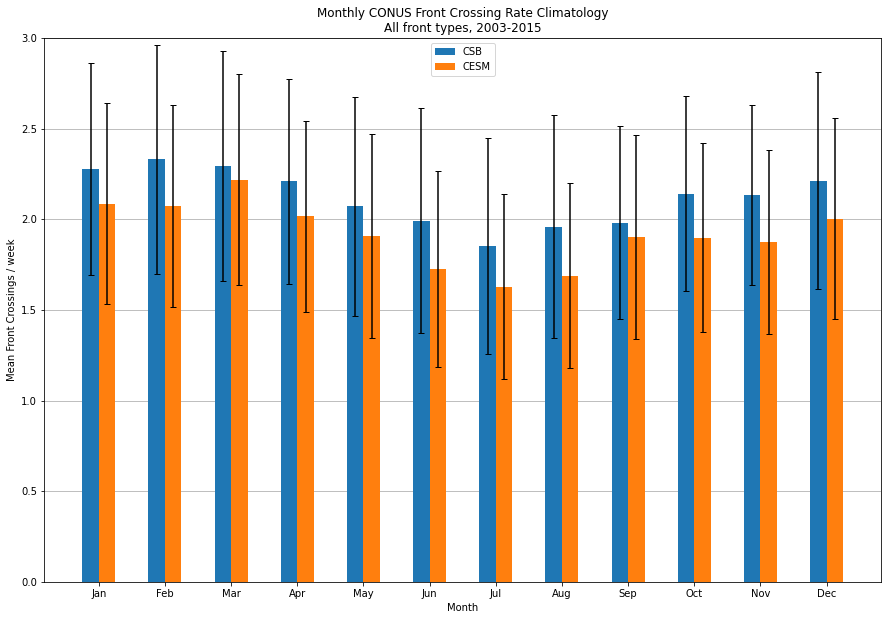

In [25]:
# monthly rate climatologies
fig, ax = plt.subplots(figsize=(15,10))

w = 0.25
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

# settings to better compare to Jim's paper
ax.set_ylim(0,3);
ax.grid(True, axis='y', zorder=0)

position = x - (w/2)
#ax.bar(position, (csb_mrates_clim_CONUS_mean*7)[:,4], yerr=(csb_mrates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="CSB", color='C0', capsize=3, zorder=3)
ax.bar(position, (csb_masked_mrates_clim_CONUS_mean*7)[:,4], yerr=(csb_masked_mrates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="CSB", color='C0', capsize=3, zorder=3)
position = x + (w/2)
ax.bar(position, (cesm_mrates_clim_CONUS_mean*7)[:,4], yerr=(cesm_mrates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="CESM", color='C1', capsize=3, zorder=3)

ax.set_title('Monthly CONUS Front Crossing Rate Climatology\nAll front types, 2003-2015')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Month')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend();

# use unmasked csb to compare with cesm; masked csb to compare with Jim's paper
#plt.savefig('../figures/toSCP/csb_cesm_mrates_clim_CONUS_mean_wk_stdev.png', bbox_inches='tight')
#plt.savefig('../figures/toSCP/csb_masked_cesm_mrates_clim_CONUS_mean_wk.png', bbox_inches='tight')

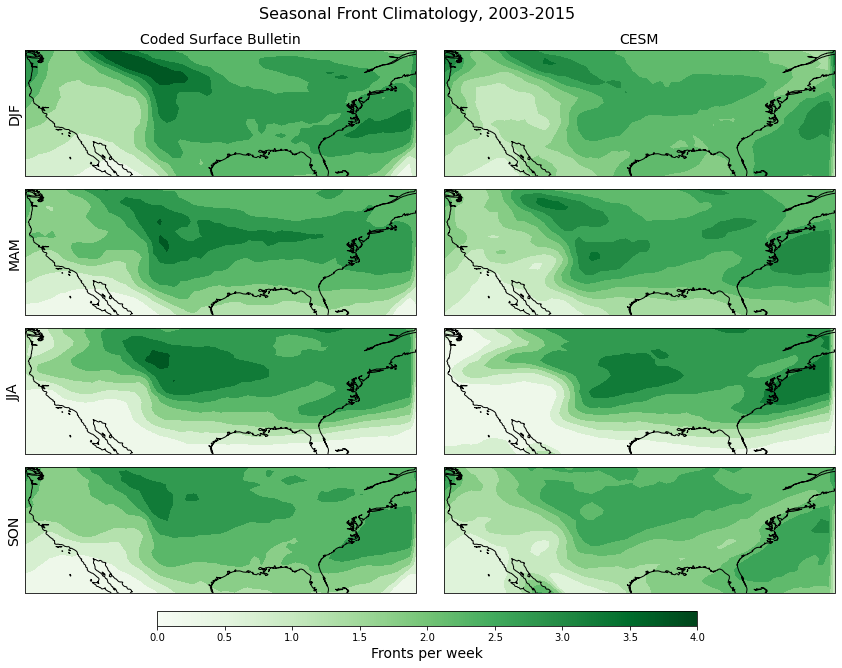

In [26]:
# spatial plots by season type
seastrings = ('DJF', 'MAM', 'JJA', 'SON')
nsea = len(seastrings)
fig, axs = plt.subplots(nsea, 2, figsize=(15,10), subplot_kw={'projection': ccrs.LambertCylindrical()})

for i in range(nsea):
    if i == 0:
        axs[i,0].set_title('Coded Surface Bulletin', fontsize=14) 
    field, lon = add_cyclic_point((csb_srates_clim_CONUS*7)[i,4,:,:], coord=csb_srates_clim_CONUS.lon)
    lat = csb_srates_clim_CONUS.lat
    cf = axs[i,0].contourf(lon, lat, field, cmap=cm.Greens, vmin=0, vmax=4, transform=ccrs.PlateCarree()) 
    #cf = axs[i,0].pcolormesh(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree()) # trying to get rid of contourf interpolation
    axs[i,0].coastlines()
    # can't get ylabels to work?
    axs[i,0].set_ylabel(seastrings[i], fontsize=14)
    axs[i,0].set_yticks([])
    fig.suptitle('Seasonal Front Climatology, 2003-2015', fontsize=16, y=0.94)

    
for i in range(nsea):
    if i == 0:
        axs[i,1].set_title('CESM', fontsize=14)
    field, lon = add_cyclic_point((cesm_srates_clim_CONUS*7)[i,4,:,:], coord=cesm_srates_clim_CONUS.lon)
    lat = cesm_srates_clim_CONUS.lat
    cf = axs[i,1].contourf(lon, lat, field, cmap=cm.Greens, vmin=0, vmax=4, transform=ccrs.PlateCarree())
    #cf = axs[i,1].pcolormesh(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree()) # trying to get rid of contourf interpolation
    axs[i,1].coastlines()
    
cb_ax = fig.add_axes([0.26, 0.08, 0.5, 0.02])
cmap = mpl.cm.Greens
norm = mpl.colors.Normalize(vmin=0, vmax=4)
cb1 = mpl.colorbar.ColorbarBase(cb_ax, cmap, norm=norm, orientation='horizontal')
cb1.ax.set_xlabel('Fronts per week', fontsize=14)

plt.subplots_adjust(wspace=0, hspace=0.1)

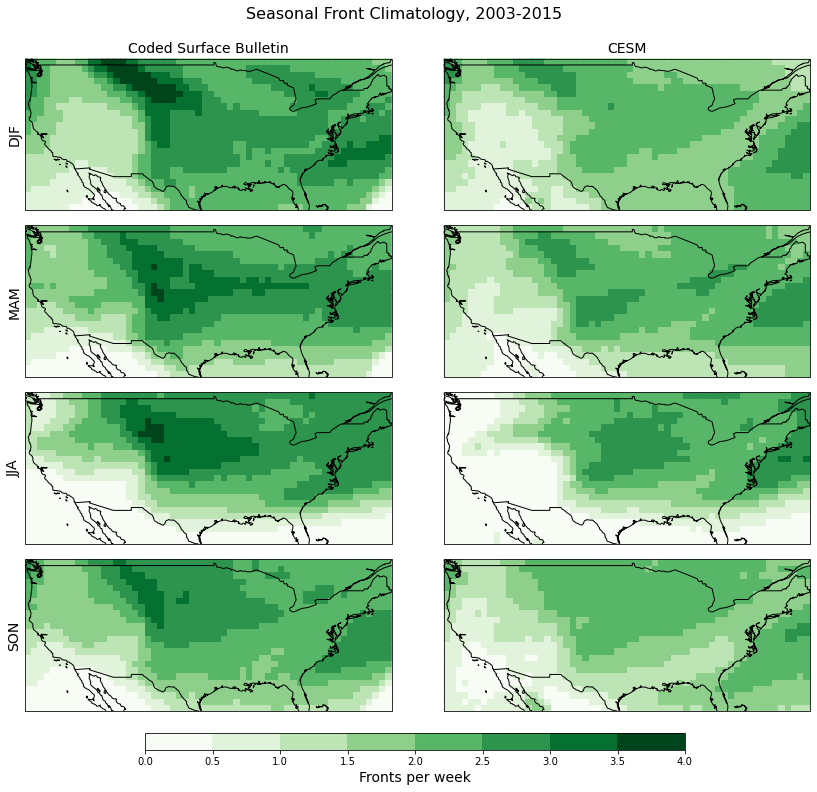

In [38]:
# by season type and change projection/contouring
seastrings = ('DJF', 'MAM', 'JJA', 'SON')
nsea = len(seastrings)
fig, axs = plt.subplots(nsea, 2, figsize=(15,12), subplot_kw={'projection': ccrs.PlateCarree()})
#fig, axs = plt.subplots(nsea, 2, figsize=(15,10), subplot_kw={'projection': ccrs.LambertCylindrical()})
#fig, axs = plt.subplots(nsea, 2, figsize=(15,10), subplot_kw={'projection': ccrs.LambertConformal()}) # some of these may not be ideal for a region (the way I've subset anyway)
#fig, axs = plt.subplots(nsea, 2, figsize=(15,10), subplot_kw={'projection': ccrs.Robinson()})

# discrete colormap
cmap=plt.cm.get_cmap('Greens', 8)

for i in range(nsea):
    if i == 0:
        axs[i,0].set_title('Coded Surface Bulletin', fontsize=14) 
    field, lon = add_cyclic_point((csb_srates_clim_CONUS*7)[i,4,:,:], coord=csb_srates_clim_CONUS.lon)
    lat = csb_srates_clim_CONUS.lat
    #cf = axs[i,0].contourf(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree()) 
    #cf = axs[i,0].pcolormesh(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree()) # trying to get rid of contourf interpolation, but pcolormesh adds a white border
    cf = axs[i,0].pcolor(lon, lat, field, cmap=cmap, vmin=0, vmax=4, transform=ccrs.PlateCarree()) # trying to get rid of the white border, does slow down a bit
    # see also: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html#differences-pcolor-pcolormesh
    axs[i,0].coastlines()
    axs[i,0].add_feature(cfeature.BORDERS)
    #axs[i,0].add_feature(cfeature.STATES)
    axs[i,0].set_ylabel(seastrings[i], fontsize=14)
    axs[i,0].set_yticks([])
    fig.suptitle('Seasonal Front Climatology, 2003-2015', fontsize=16, y=0.94)

for i in range(nsea):
    if i == 0:
        axs[i,1].set_title('CESM', fontsize=14)
    # POLYLINES
    #field, lon = add_cyclic_point((cesm_srates_clim_CONUS*7)[i,4,:,:], coord=cesm_srates_clim_CONUS.lon)
    #lat = cesm_srates_clim_CONUS.lat
    # ONE-HOT
    field, lon = add_cyclic_point((cesm_OH_srates_clim_CONUS*7)[i,4,:,:], coord=cesm_OH_srates_clim_CONUS.lon)
    lat = cesm_OH_srates_clim_CONUS.lat
    #cf = axs[i,1].contourf(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree())
    #cf = axs[i,1].pcolormesh(lon, lat, field, cmap=cm.Greens, transform=ccrs.PlateCarree())
    cf = axs[i,1].pcolor(lon, lat, field, cmap=cmap, vmin=0, vmax=4, transform=ccrs.PlateCarree())
    axs[i,1].coastlines()
    axs[i,1].add_feature(cfeature.BORDERS)
    
cb_ax = fig.add_axes([0.26, 0.08, 0.5, 0.02])
norm = mpl.colors.Normalize(vmin=0, vmax=4)
cb1 = mpl.colorbar.ColorbarBase(cb_ax, cmap, norm=norm, orientation='horizontal')
cb1.ax.set_xlabel('Fronts per week', fontsize=14)

plt.subplots_adjust(wspace=0, hspace=0.1)
#plt.savefig('../figures/toSCP/csb_cesm_srates_clim_CONUS_viaOH.png', bbox_inches='tight')
#plt.savefig('../figures/toSCP/csb_cesm_srates_clim_CONUS_viaPoly.png', bbox_inches='tight')

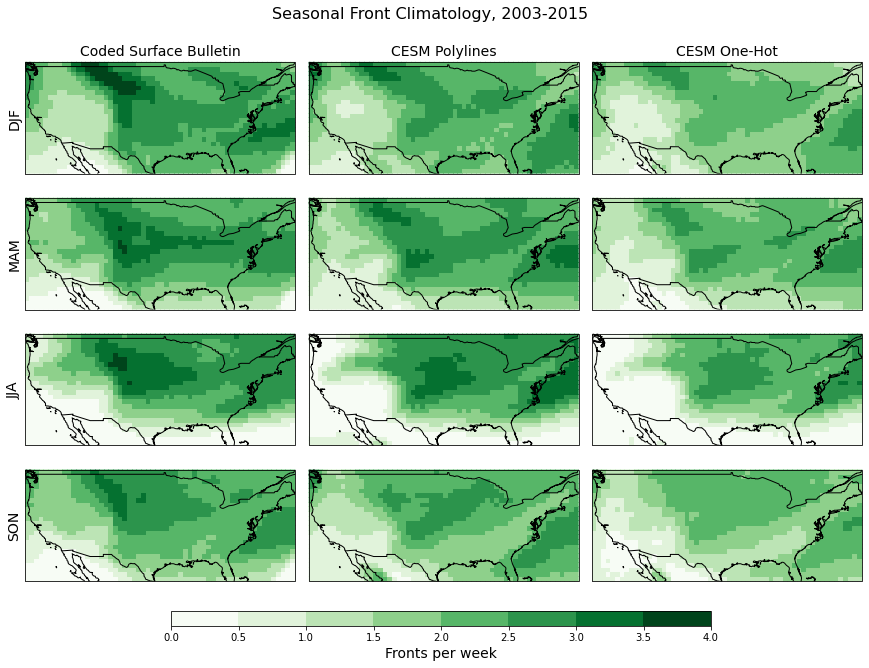

In [39]:
# side-by-side polyline and one-hot spatial plots
seastrings = ('DJF', 'MAM', 'JJA', 'SON')
nsea = len(seastrings)
fig, axs = plt.subplots(nsea, 3, figsize=(15,10), subplot_kw={'projection': ccrs.PlateCarree()})

# discrete colormap
cmap=plt.cm.get_cmap('Greens', 8)

for i in range(nsea):
    if i == 0:
        axs[i,0].set_title('Coded Surface Bulletin', fontsize=14) 
    field, lon = add_cyclic_point((csb_srates_clim_CONUS*7)[i,4,:,:], coord=csb_srates_clim_CONUS.lon)
    lat = csb_srates_clim_CONUS.lat
    cf = axs[i,0].pcolor(lon, lat, field, cmap=cmap, vmin=0, vmax=4, transform=ccrs.PlateCarree()) 
    axs[i,0].coastlines()
    axs[i,0].add_feature(cfeature.BORDERS)
    axs[i,0].set_ylabel(seastrings[i], fontsize=14)
    axs[i,0].set_yticks([])
    fig.suptitle('Seasonal Front Climatology, 2003-2015', fontsize=16, y=0.94)

for i in range(nsea):
    if i == 0:
        axs[i,1].set_title('CESM Polylines', fontsize=14)
    field, lon = add_cyclic_point((cesm_srates_clim_CONUS*7)[i,4,:,:], coord=cesm_srates_clim_CONUS.lon)
    lat = cesm_srates_clim_CONUS.lat
    cf = axs[i,1].pcolor(lon, lat, field, cmap=cmap, vmin=0, vmax=4, transform=ccrs.PlateCarree())
    axs[i,1].coastlines()
    axs[i,1].add_feature(cfeature.BORDERS)
    
for i in range(nsea):
    if i == 0:
        axs[i,2].set_title('CESM One-Hot', fontsize=14)
    field, lon = add_cyclic_point((cesm_OH_srates_clim_CONUS*7)[i,4,:,:], coord=cesm_OH_srates_clim_CONUS.lon)
    lat = cesm_OH_srates_clim_CONUS.lat
    cf = axs[i,2].pcolor(lon, lat, field, cmap=cmap, vmin=0, vmax=4, transform=ccrs.PlateCarree())
    axs[i,2].coastlines()
    axs[i,2].add_feature(cfeature.BORDERS)
    
cb_ax = fig.add_axes([0.26, 0.08, 0.5, 0.02])
norm = mpl.colors.Normalize(vmin=0, vmax=4)
cb1 = mpl.colorbar.ColorbarBase(cb_ax, cmap, norm=norm, orientation='horizontal')
cb1.ax.set_xlabel('Fronts per week', fontsize=14)

plt.subplots_adjust(wspace=0.05, hspace=0)
#plt.savefig('../figures/toSCP/csb_cesm_srates_clim_CONUS_viaPoly_OH.png', bbox_inches='tight')

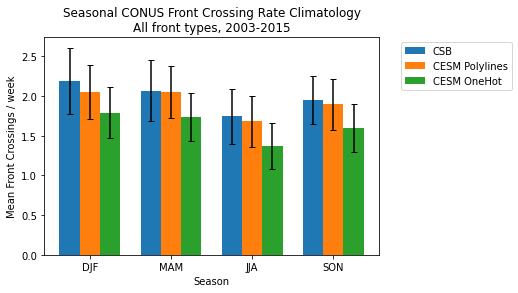

In [100]:
# side-by-side polyline and one-hot bar plots
fig, ax = plt.subplots()

# number of bars per xlabel
nbars=3
# width
w = 0.75/nbars

labels = ['DJF', 'MAM', 'JJA', 'SON']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x + (w*(1-nbars)/2) + 0*w
ax.bar(position, (csb_srates_clim_CONUS_mean*7)[:,4], yerr=(csb_srates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="CSB", color='C0', capsize=3)
position = x + (w*(1-nbars)/2) + 1*w
ax.bar(position, (cesm_srates_clim_CONUS_mean*7)[:,4], yerr=(cesm_srates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="CESM Polylines", color='C1', capsize=3)
position = x + (w*(1-nbars)/2) + 2*w
ax.bar(position, (cesm_OH_srates_clim_CONUS_mean*7)[:,4], yerr=(cesm_OH_srates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="CESM OneHot", color='C2', capsize=3)

ax.set_title('Seasonal CONUS Front Crossing Rate Climatology\nAll front types, 2003-2015')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(bbox_to_anchor=(1.05, 1));
#plt.savefig('../figures/toSCP/csb_cesm_PolyOH_srates_clim_CONUS_mean_wk_stdev.png', bbox_inches='tight')

## Compare MERRA / CSB, 2003-2015

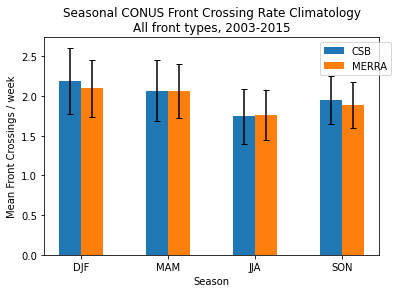

In [32]:
# seasonal rate climatologies
fig, ax = plt.subplots()

w = 0.25
labels = ['DJF', 'MAM', 'JJA', 'SON']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x - (w/2)
ax.bar(position, (csb_srates_clim_CONUS_mean*7)[:,4], yerr=(csb_srates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="CSB", color='C0', capsize=3)
position = x + (w/2)
ax.bar(position, (merra_srates_clim_CONUS_mean*7)[:,4], yerr=(merra_srates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="MERRA", color='C1', capsize=3)

ax.set_title('Seasonal CONUS Front Crossing Rate Climatology\nAll front types, 2003-2015')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(bbox_to_anchor=(1.05, 1));
#plt.savefig('../figures/toSCP/csb_merra_srates_clim_CONUS_mean_wk_stdev.png', bbox_inches='tight')

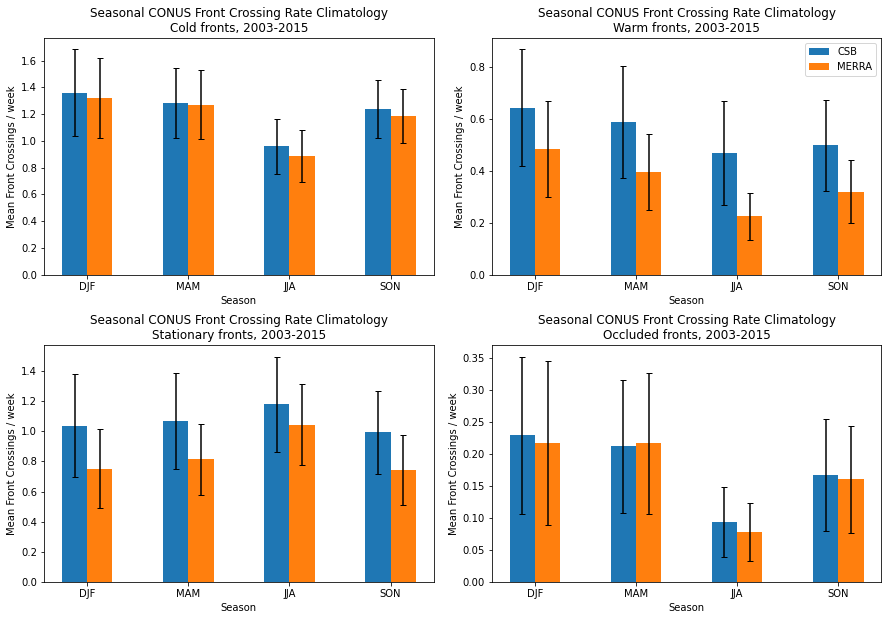

In [40]:
# by front type
frontstrings = ('Cold', 'Warm', 'Stationary', 'Occluded')
nfronts = len(frontstrings)
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax = ax.ravel()

for i in range(nfronts):
    w = 0.25
    labels = ['DJF', 'MAM', 'JJA', 'SON']
    nseason = len(labels)
    x = np.arange(nseason)  # the label locations

    position = x - (w/2)
    ax[i].bar(position, (csb_srates_clim_CONUS_mean*7)[:,i], yerr=(csb_srates_clim_stdev_CONUS_mean*7)[:,i], width=w, label="CSB", color='C0', capsize=3)
    position = x + (w/2)
    ax[i].bar(position, (merra_srates_clim_CONUS_mean*7)[:,i], yerr=(merra_srates_clim_stdev_CONUS_mean*7)[:,i], width=w, label="MERRA", color='C1', capsize=3)

    ax[i].set_title('Seasonal CONUS Front Crossing Rate Climatology\n'+frontstrings[i]+' fronts, 2003-2015')
    ax[i].set_ylabel('Mean Front Crossings / week')
    ax[i].set_xlabel('Season')
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(labels)

    if i==1:
        ax[i].legend();
        
plt.subplots_adjust(wspace=0.15, hspace=0.3)
#plt.savefig('../figures/toSCP/csb_merra_srates_clim_CONUS_mean_wk_byfronttype_stdev.png', bbox_inches='tight')

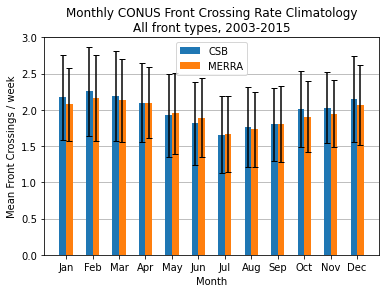

In [41]:
# monthly rate climatologies
fig, ax = plt.subplots()

w = 0.25
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

# settings to better compare to Jim's paper
ax.set_ylim(0,3);
ax.grid(True, axis='y', zorder=0)

position = x - (w/2)
ax.bar(position, (csb_mrates_clim_CONUS_mean*7)[:,4], yerr=(csb_mrates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="CSB", color='C0', capsize=3, zorder=3)
position = x + (w/2)
ax.bar(position, (merra_mrates_clim_CONUS_mean*7)[:,4], yerr=(merra_mrates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="MERRA", color='C1', capsize=3, zorder=3)

ax.set_title('Monthly CONUS Front Crossing Rate Climatology\nAll front types, 2003-2015')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Month')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend();

# use unmasked csb to compare with merra; masked csb to compare with Jim's paper
#plt.savefig('../figures/toSCP/csb_merra_mrates_clim_CONUS_mean_wk_stdev.png', bbox_inches='tight')

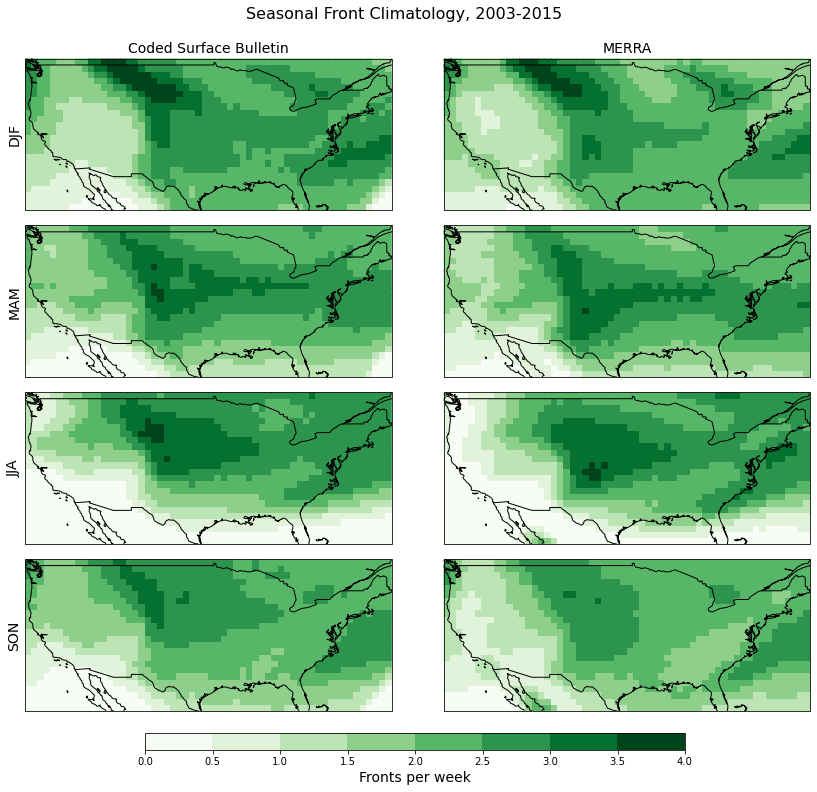

In [43]:
# spatial plots by season type
seastrings = ('DJF', 'MAM', 'JJA', 'SON')
nsea = len(seastrings)
fig, axs = plt.subplots(nsea, 2, figsize=(15,12), subplot_kw={'projection': ccrs.PlateCarree()})

# discrete colormap
cmap=plt.cm.get_cmap('Greens', 8)

for i in range(nsea):
    if i == 0:
        axs[i,0].set_title('Coded Surface Bulletin', fontsize=14) 
    field, lon = add_cyclic_point((csb_srates_clim_CONUS*7)[i,4,:,:], coord=csb_srates_clim_CONUS.lon)
    lat = csb_srates_clim_CONUS.lat
    cf = axs[i,0].pcolor(lon, lat, field, cmap=cmap, vmin=0, vmax=4, transform=ccrs.PlateCarree())
    axs[i,0].coastlines()
    axs[i,0].add_feature(cfeature.BORDERS)
    #axs[i,0].add_feature(cfeature.STATES)
    axs[i,0].set_ylabel(seastrings[i], fontsize=14)
    axs[i,0].set_yticks([])
    fig.suptitle('Seasonal Front Climatology, 2003-2015', fontsize=16, y=0.94)

for i in range(nsea):
    if i == 0:
        axs[i,1].set_title('MERRA', fontsize=14)
    field, lon = add_cyclic_point((merra_srates_clim_CONUS*7)[i,4,:,:], coord=merra_srates_clim_CONUS.lon)
    lat = merra_srates_clim_CONUS.lat
    cf = axs[i,1].pcolor(lon, lat, field, cmap=cmap, vmin=0, vmax=4, transform=ccrs.PlateCarree())
    axs[i,1].coastlines()
    axs[i,1].add_feature(cfeature.BORDERS)
    
cb_ax = fig.add_axes([0.26, 0.08, 0.5, 0.02])
norm = mpl.colors.Normalize(vmin=0, vmax=4)
cb1 = mpl.colorbar.ColorbarBase(cb_ax, cmap, norm=norm, orientation='horizontal')
cb1.ax.set_xlabel('Fronts per week', fontsize=14)

plt.subplots_adjust(wspace=0, hspace=0.1)
#plt.savefig('../figures/toSCP/csb_merra_srates_clim_CONUS_viaPoly.png', bbox_inches='tight')

## Compare MERRA / CESM, 2000-2015

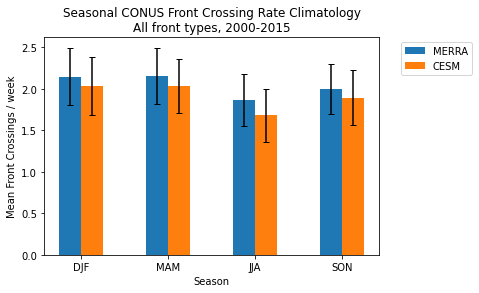

In [45]:
# seasonal rate climatologies
fig, ax = plt.subplots()

w = 0.25
labels = ['DJF', 'MAM', 'JJA', 'SON']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x - (w/2)
ax.bar(position, (merra_cesm_srates_clim_CONUS_mean*7)[:,4], yerr=(merra_cesm_srates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="MERRA", color='C0', capsize=3)
position = x + (w/2)
ax.bar(position, (cesm_full_srates_clim_CONUS_mean*7)[:,4], yerr=(cesm_full_srates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="CESM", color='C1', capsize=3)

ax.set_title('Seasonal CONUS Front Crossing Rate Climatology\nAll front types, 2000-2015')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(bbox_to_anchor=(1.05, 1));
#plt.savefig('../figures/toSCP/merra_cesm_srates_clim_CONUS_mean_wk_stdev.png', bbox_inches='tight')

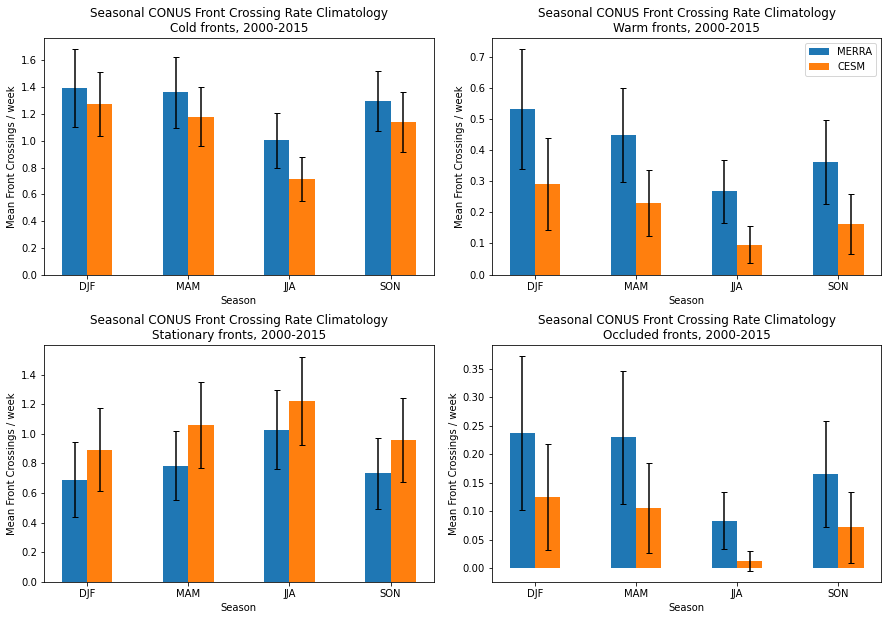

In [48]:
# by front type
frontstrings = ('Cold', 'Warm', 'Stationary', 'Occluded')
nfronts = len(frontstrings)
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax = ax.ravel()

for i in range(nfronts):
    w = 0.25
    labels = ['DJF', 'MAM', 'JJA', 'SON']
    nseason = len(labels)
    x = np.arange(nseason)  # the label locations

    position = x - (w/2)
    ax[i].bar(position, (merra_cesm_srates_clim_CONUS_mean*7)[:,i], yerr=(merra_cesm_srates_clim_stdev_CONUS_mean*7)[:,i], width=w, label="MERRA", color='C0', capsize=3)
    position = x + (w/2)
    ax[i].bar(position, (cesm_full_srates_clim_CONUS_mean*7)[:,i], yerr=(cesm_full_srates_clim_stdev_CONUS_mean*7)[:,i], width=w, label="CESM", color='C1', capsize=3)

    ax[i].set_title('Seasonal CONUS Front Crossing Rate Climatology\n'+frontstrings[i]+' fronts, 2000-2015')
    ax[i].set_ylabel('Mean Front Crossings / week')
    ax[i].set_xlabel('Season')
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(labels)

    if i==1:
        ax[i].legend();
        
plt.subplots_adjust(wspace=0.15, hspace=0.3)
#plt.savefig('../figures/toSCP/merra_cesm_srates_clim_CONUS_mean_wk_byfronttype_stdev.png', bbox_inches='tight')

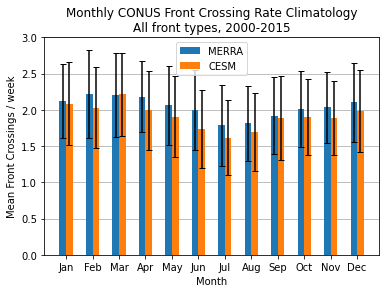

In [50]:
# monthly rate climatologies
fig, ax = plt.subplots()

w = 0.25
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

# settings to better compare to Jim's paper
ax.set_ylim(0,3);
ax.grid(True, axis='y', zorder=0)

position = x - (w/2)
ax.bar(position, (merra_cesm_mrates_clim_CONUS_mean*7)[:,4], yerr=(merra_cesm_mrates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="MERRA", color='C0', capsize=3, zorder=3)
position = x + (w/2)
ax.bar(position, (cesm_full_mrates_clim_CONUS_mean*7)[:,4], yerr=(cesm_full_mrates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="CESM", color='C1', capsize=3, zorder=3)

ax.set_title('Monthly CONUS Front Crossing Rate Climatology\nAll front types, 2000-2015')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Month')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend();

#plt.savefig('../figures/toSCP/merra_cesm_mrates_clim_CONUS_mean_wk_stdev.png', bbox_inches='tight')

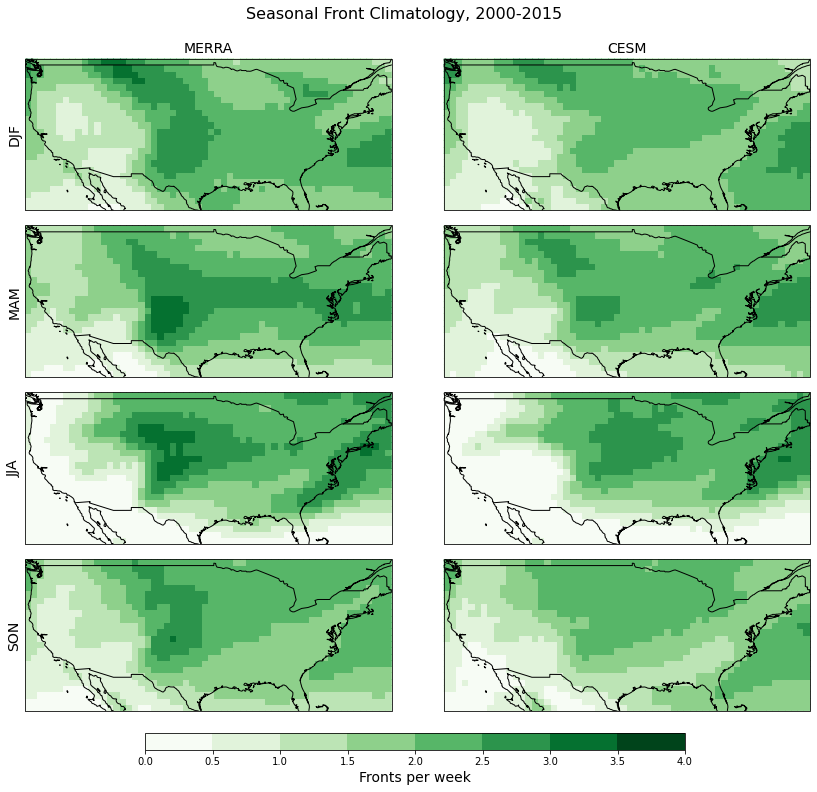

In [56]:
# spatial plots by season type
seastrings = ('DJF', 'MAM', 'JJA', 'SON')
nsea = len(seastrings)
fig, axs = plt.subplots(nsea, 2, figsize=(15,12), subplot_kw={'projection': ccrs.PlateCarree()})

# discrete colormap
cmap=plt.cm.get_cmap('Greens', 8)
vmax=4
#cmap=plt.cm.get_cmap('Greens', 6)
#vmax=3

for i in range(nsea):
    if i == 0:
        axs[i,0].set_title('MERRA', fontsize=14)
    # POLYLINES
    #field, lon = add_cyclic_point((merra_cesm_srates_clim_CONUS*7)[i,4,:,:], coord=merra_cesm_srates_clim_CONUS.lon)
    #lat = merra_cesm_srates_clim_CONUS.lat
    # ONE-HOT
    field, lon = add_cyclic_point((merra_cesm_OH_srates_clim_CONUS*7)[i,4,:,:], coord=merra_cesm_OH_srates_clim_CONUS.lon)
    lat = merra_cesm_OH_srates_clim_CONUS.lat
    cf = axs[i,0].pcolor(lon, lat, field, cmap=cmap, vmin=0, vmax=vmax, transform=ccrs.PlateCarree())
    axs[i,0].coastlines()
    axs[i,0].add_feature(cfeature.BORDERS)
    axs[i,0].set_ylabel(seastrings[i], fontsize=14)
    axs[i,0].set_yticks([])
    fig.suptitle('Seasonal Front Climatology, 2000-2015', fontsize=16, y=0.94)

    
for i in range(nsea):
    if i == 0:
        axs[i,1].set_title('CESM', fontsize=14)
    # POYLINES
    #field, lon = add_cyclic_point((cesm_full_srates_clim_CONUS*7)[i,4,:,:], coord=cesm_full_srates_clim_CONUS.lon)
    #lat = cesm_full_srates_clim_CONUS.lat
    # ONE-HOT
    field, lon = add_cyclic_point((cesm_OH_full_srates_clim_CONUS*7)[i,4,:,:], coord=cesm_OH_full_srates_clim_CONUS.lon)
    lat = cesm_OH_full_srates_clim_CONUS.lat
    cf = axs[i,1].pcolor(lon, lat, field, cmap=cmap, vmin=0, vmax=vmax, transform=ccrs.PlateCarree())
    axs[i,1].coastlines()
    axs[i,1].add_feature(cfeature.BORDERS)
    
cb_ax = fig.add_axes([0.26, 0.08, 0.5, 0.02])
norm = mpl.colors.Normalize(vmin=0, vmax=vmax)
cb1 = mpl.colorbar.ColorbarBase(cb_ax, cmap, norm=norm, orientation='horizontal')
cb1.ax.set_xlabel('Fronts per week', fontsize=14)

plt.subplots_adjust(wspace=0, hspace=0.1)
#plt.savefig('../figures/toSCP/merra_cesm_srates_clim_CONUS_viaPoly.png', bbox_inches='tight')
#plt.savefig('../figures/toSCP/merra_cesm_srates_clim_CONUS_viaOH.png', bbox_inches='tight')

## Compare CESM, present/future

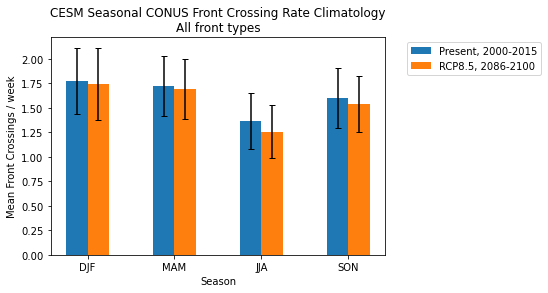

In [59]:
# seasonal rate climatologies
fig, ax = plt.subplots()

w = 0.25
labels = ['DJF', 'MAM', 'JJA', 'SON']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

position = x - (w/2)
ax.bar(position, (cesm_OH_full_srates_clim_CONUS_mean*7)[:,4], yerr=(cesm_OH_full_srates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="Present, 2000-2015", color='C0', capsize=3)
#ax.bar(position, (cesm_fullmod_srates_clim_CONUS_mean*7)[:,4], yerr=(cesm_fullmod_srates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="Present, 2000-2014", color='C0', capsize=3)
position = x + (w/2)
ax.bar(position, (cesm_OH_rcp85_srates_clim_CONUS_mean*7)[:,4], yerr=(cesm_OH_rcp85_srates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="RCP8.5, 2086-2100", color='C1', capsize=3)
#ax.bar(position, (cesm_rcp85_srates_clim_CONUS_mean*7)[:,4], yerr=(cesm_rcp85_srates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="RCP8.5, 2086-2100", color='C1', capsize=3)

ax.set_title('CESM Seasonal CONUS Front Crossing Rate Climatology\nAll front types')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(bbox_to_anchor=(1.05, 1));
#plt.savefig('../figures/toSCP/cesm_hist_rcp85_OH_srates_clim_CONUS_mean_wk_stdev.png', bbox_inches='tight')
#plt.savefig('../figures/toSCP/cesm_hist_rcp85_srates_clim_CONUS_mean_wk_stdev.png', bbox_inches='tight')

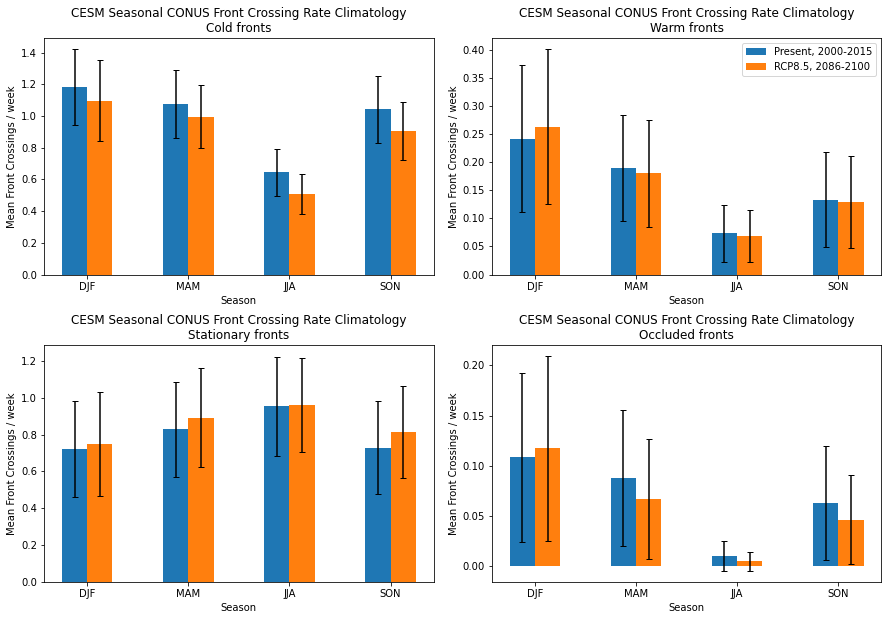

In [62]:
# by front type
frontstrings = ('Cold', 'Warm', 'Stationary', 'Occluded')
nfronts = len(frontstrings)
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax = ax.ravel()

for i in range(nfronts):
    w = 0.25
    labels = ['DJF', 'MAM', 'JJA', 'SON']
    nseason = len(labels)
    x = np.arange(nseason)  # the label locations

    position = x - (w/2)
    ax[i].bar(position, (cesm_OH_full_srates_clim_CONUS_mean*7)[:,i], yerr=(cesm_OH_full_srates_clim_stdev_CONUS_mean*7)[:,i], width=w, label="Present, 2000-2015", color='C0', capsize=3)
    #ax[i].bar(position, (cesm_fullmod_srates_clim_CONUS_mean*7)[:,i], yerr=(cesm_fullmod_srates_clim_stdev_CONUS_mean*7)[:,i], width=w, label="Present, 2000-2014", color='C0', capsize=3)

    position = x + (w/2)
    ax[i].bar(position, (cesm_OH_rcp85_srates_clim_CONUS_mean*7)[:,i], yerr=(cesm_OH_rcp85_srates_clim_stdev_CONUS_mean*7)[:,i], width=w, label="RCP8.5, 2086-2100", color='C1', capsize=3)
    #ax[i].bar(position, (cesm_rcp85_srates_clim_CONUS_mean*7)[:,i], yerr=(cesm_rcp85_srates_clim_stdev_CONUS_mean*7)[:,i], width=w, label="RCP8.5, 2086-2100", color='C1', capsize=3)
  
    ax[i].set_title('CESM Seasonal CONUS Front Crossing Rate Climatology\n'+frontstrings[i]+' fronts')
    ax[i].set_ylabel('Mean Front Crossings / week')
    ax[i].set_xlabel('Season')
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(labels)

    if i==1:
        ax[i].legend();
        
plt.subplots_adjust(wspace=0.15, hspace=0.3)
#plt.savefig('../figures/toSCP/cesm_hist_rcp85_OH_srates_clim_CONUS_mean_wk_byfronttype_stdev.png', bbox_inches='tight')
#plt.savefig('../figures/toSCP/cesm_hist_rcp85_srates_clim_CONUS_mean_wk_byfronttype_stdev.png', bbox_inches='tight')

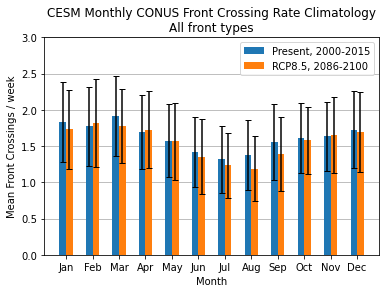

In [64]:
# monthly rate climatologies
fig, ax = plt.subplots()

w = 0.25
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
nseason = len(labels)
x = np.arange(nseason)  # the label locations

# settings to better compare to Jim's paper
ax.set_ylim(0,3);
ax.grid(True, axis='y', zorder=0)

position = x - (w/2)
ax.bar(position, (cesm_OH_full_mrates_clim_CONUS_mean*7)[:,4], yerr=(cesm_OH_full_mrates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="Present, 2000-2015", color='C0', capsize=3, zorder=3)
#ax.bar(position, (cesm_fullmod_mrates_clim_CONUS_mean*7)[:,4], yerr=(cesm_fullmod_mrates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="Present, 2000-2014", color='C0', capsize=3, zorder=3)
position = x + (w/2)
ax.bar(position, (cesm_OH_rcp85_mrates_clim_CONUS_mean*7)[:,4], yerr=(cesm_OH_rcp85_mrates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="RCP8.5, 2086-2100", color='C1', capsize=3, zorder=3)
#ax.bar(position, (cesm_rcp85_mrates_clim_CONUS_mean*7)[:,4], yerr=(cesm_rcp85_mrates_clim_stdev_CONUS_mean*7)[:,4], width=w, label="RCP8.5, 2086-2100", color='C1', capsize=3, zorder=3)

ax.set_title('CESM Monthly CONUS Front Crossing Rate Climatology\nAll front types')
ax.set_ylabel('Mean Front Crossings / week')
ax.set_xlabel('Month')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend();

#plt.savefig('../figures/toSCP/cesm_hist_rcp85_OH_mrates_clim_CONUS_mean_wk_stdev.png', bbox_inches='tight')
#plt.savefig('../figures/toSCP/cesm_hist_rcp85_mrates_clim_CONUS_mean_wk_stdev.png', bbox_inches='tight')

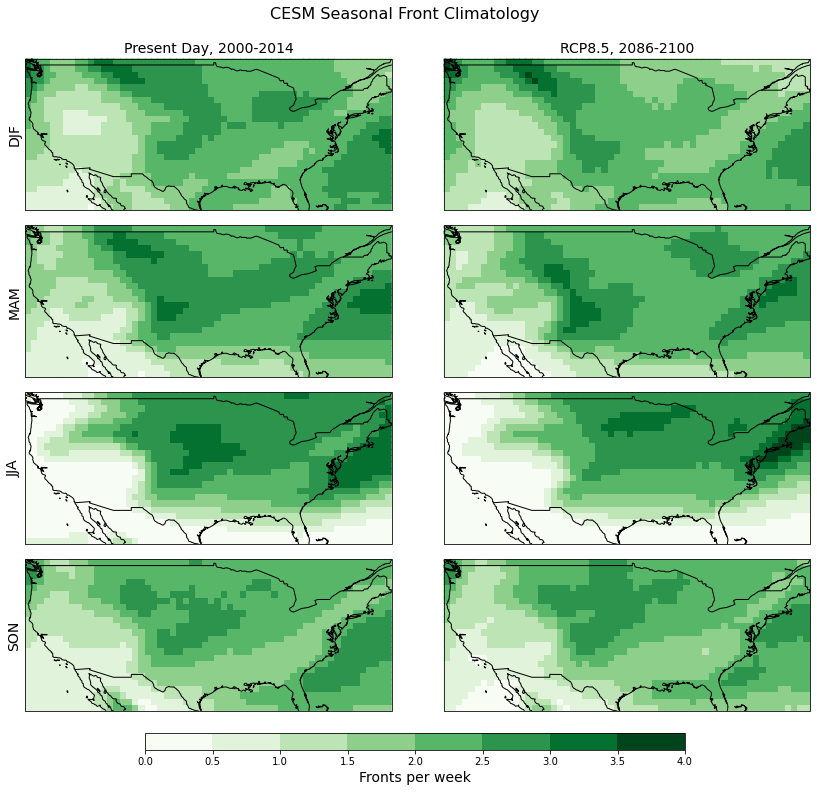

In [72]:
# spatial plots by season type
seastrings = ('DJF', 'MAM', 'JJA', 'SON')
nsea = len(seastrings)
fig, axs = plt.subplots(nsea, 2, figsize=(15,12), subplot_kw={'projection': ccrs.PlateCarree()})

# discrete colormap
cmap=plt.cm.get_cmap('Greens', 8)
vmax=4 # polylines
#vmax=3 # OH

for i in range(nsea):
    if i == 0:
        #axs[i,0].set_title('Present Day, 2000-2015', fontsize=14) 
        axs[i,0].set_title('Present Day, 2000-2014', fontsize=14) 
    # OH, 2000-2015
    #field, lon = add_cyclic_point((cesm_OH_full_srates_clim_CONUS*7)[i,4,:,:], coord=cesm_OH_full_srates_clim_CONUS.lon)
    #lat = cesm_OH_full_srates_clim_CONUS.lat
    # PL, 2000-2014
    field, lon = add_cyclic_point((cesm_fullmod_srates_clim_CONUS*7)[i,4,:,:], coord=cesm_fullmod_srates_clim_CONUS.lon)
    lat = cesm_fullmod_srates_clim_CONUS.lat
    # OH, 2000-2014
    #field, lon = add_cyclic_point((cesm_OH_fullmod_srates_clim_CONUS*7)[i,4,:,:], coord=cesm_OH_fullmod_srates_clim_CONUS.lon)
    #lat = cesm_OH_fullmod_srates_clim_CONUS.lat
    cf = axs[i,0].pcolor(lon, lat, field, cmap=cmap, vmin=0, vmax=vmax, transform=ccrs.PlateCarree())
    axs[i,0].coastlines()
    axs[i,0].add_feature(cfeature.BORDERS)
    axs[i,0].set_ylabel(seastrings[i], fontsize=14)
    axs[i,0].set_yticks([])
    fig.suptitle('CESM Seasonal Front Climatology', fontsize=16, y=0.94)

    
for i in range(nsea):
    if i == 0:
        axs[i,1].set_title('RCP8.5, 2086-2100', fontsize=14)
    #field, lon = add_cyclic_point((cesm_OH_rcp85_srates_clim_CONUS*7)[i,4,:,:], coord=cesm_OH_rcp85_srates_clim_CONUS.lon)
    #lat = cesm_OH_rcp85_srates_clim_CONUS.lat
    field, lon = add_cyclic_point((cesm_rcp85_srates_clim_CONUS*7)[i,4,:,:], coord=cesm_rcp85_srates_clim_CONUS.lon)
    lat = cesm_rcp85_srates_clim_CONUS.lat
    cf = axs[i,1].pcolor(lon, lat, field, cmap=cmap, vmin=0, vmax=vmax, transform=ccrs.PlateCarree())
    axs[i,1].coastlines()
    axs[i,1].add_feature(cfeature.BORDERS)
    
cb_ax = fig.add_axes([0.26, 0.08, 0.5, 0.02])
norm = mpl.colors.Normalize(vmin=0, vmax=vmax)
cb1 = mpl.colorbar.ColorbarBase(cb_ax, cmap, norm=norm, orientation='horizontal')
cb1.ax.set_xlabel('Fronts per week', fontsize=14)

plt.subplots_adjust(wspace=0, hspace=0.1)
#plt.savefig('../figures/toSCP/cesm_hist_rcp85_srates_clim_CONUS_viaPoly.png', bbox_inches='tight')
#plt.savefig('../figures/toSCP/cesm_hist_rcp85_srates_clim_CONUS_viaOH_15yr.png', bbox_inches='tight')

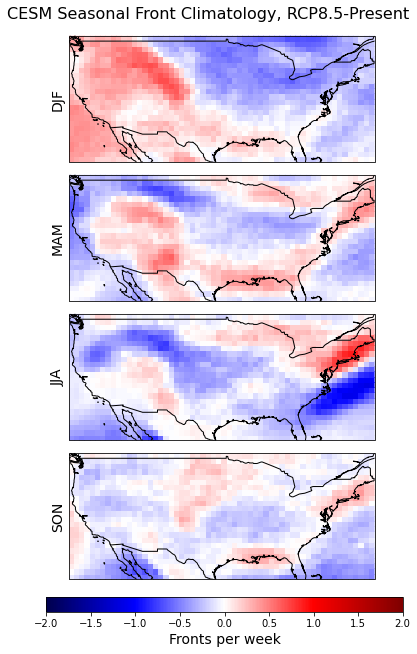

In [35]:
# different plots (spatial/seasonal)
seastrings = ('DJF', 'MAM', 'JJA', 'SON')
nsea = len(seastrings)
fig, axs = plt.subplots(nsea, 1, figsize=(15,10), subplot_kw={'projection': ccrs.PlateCarree()})

# colormap
cmap = plt.cm.get_cmap('seismic')

# PL, 2086-2100 - 2000-2014
cesm_srates_clim_CONUS_diff = cesm_rcp85_srates_clim_CONUS - cesm_fullmod_srates_clim_CONUS
#print(cesm_srates_clim_CONUS_diff.max())
#print(cesm_srates_clim_CONUS_diff.min())

for i in range(nsea):
    field, lon = add_cyclic_point((cesm_srates_clim_CONUS_diff*7)[i,4,:,:], coord=cesm_srates_clim_CONUS_diff.lon)
    lat = cesm_srates_clim_CONUS_diff.lat
    cf = axs[i].pcolor(lon, lat, field, cmap=cmap, vmin=-2, vmax=2, transform=ccrs.PlateCarree())
    axs[i].coastlines()
    axs[i].add_feature(cfeature.BORDERS)
    axs[i].set_ylabel(seastrings[i], fontsize=14)
    axs[i].set_yticks([])
    fig.suptitle('CESM Seasonal Front Climatology, RCP8.5-Present', fontsize=16, y=0.92)

cb_ax = fig.add_axes([0.35, 0.08, 0.33, 0.02])
norm = mpl.colors.Normalize(vmin=-2, vmax=2)
cb1 = mpl.colorbar.ColorbarBase(cb_ax, cmap, norm=norm, orientation='horizontal')
cb1.ax.set_xlabel('Fronts per week', fontsize=14)

plt.subplots_adjust(wspace=0, hspace=0.1)
#plt.savefig('../figures/toSCP/cesm_hist_rcp85_srates_clim_CONUS_viaPoly_diff.png', bbox_inches='tight')

In [36]:
cesm_srates_clim_CONUS_diff

<xarray.DataArray 'seasonal_rate_climatology' (seasons4: 4, front: 5, lat: 25, lon: 58)>
array([[[[ 4.81384844e-02,  4.29533571e-02,  3.92500609e-02, ...,
          -1.70589834e-02, -1.40958279e-02, -5.20624220e-03],
         [ 4.51744199e-02,  4.66560349e-02,  4.96194065e-02, ...,
          -3.03942412e-02, -2.29862779e-02, -2.07641870e-02],
         [ 5.18402457e-02,  4.66553420e-02,  5.03593907e-02, ...,
          -1.85425878e-02, -2.44692713e-02, -1.85427368e-02],
         ...,
         [-1.18645281e-02, -1.70482844e-02, -1.48237348e-02, ...,
          -3.18646729e-02, -4.14939001e-02, -3.11219469e-02],
         [-8.15823674e-03, -7.41542876e-03, -8.89575481e-03, ...,
          -3.63085717e-02, -3.18635106e-02, -3.70478779e-02],
         [-4.45246696e-03, -4.45102900e-03, -2.96824425e-03, ...,
          -3.33442464e-02, -3.48256528e-02, -3.63065898e-02]],

        [[ 3.70329153e-03,  2.96262023e-03,  4.44423873e-03, ...,
           1.48141980e-02,  1.55548006e-02,  1.25915641e-02],
         [ 5.92544582e-03,  4.44396399e-03,  5.18477336e-03, ...,
           2.14805901e-02,  1.92583669e-02,  1.99988335e-02],
         [ 1.18511654e-02,  1.48141980e-02,  1.25919748e-02, ...,
           2.14799028e-02,  2.07390245e-02,  2.44427957e-02],
         ...,
         [-2.52020657e-02, -2.51991004e-02, -1.77873746e-02, ...,
           5.92167303e-03,  1.03667341e-02,  5.18120453e-03],
         [-2.14952677e-02, -1.77879259e-02, -1.11177638e-02, ...,
           7.40411505e-03,  1.03676263e-02,  3.70068476e-03],
         [-1.85270905e-02, -1.33388899e-02, -1.03738680e-02, ...,
           2.21968442e-03,  2.96083651e-03,  8.14622641e-03]],

        [[ 1.25913573e-02,  7.40637910e-03,  7.40651600e-03, ...,
           9.61385667e-03,  5.90947270e-03,  1.10945106e-02],
         [ 1.11097386e-02,  7.40617234e-03,  7.40637910e-03, ...,
          -4.45939600e-03,  7.25373626e-04, -1.49685144e-03],
         [ 1.11094639e-02,  6.66536298e-03,  7.40637910e-03, ...,
          -1.85326487e-02, -1.63106322e-02, -1.03847682e-02],
         ...,
         [ 7.10914731e-02,  7.18317628e-02,  7.25723654e-02, ...,
          -8.15480202e-03, -5.93230128e-03, -7.41399825e-03],
         [ 6.88676089e-02,  6.21999204e-02,  5.70148081e-02, ...,
          -5.19197434e-03, -5.93374670e-03, -5.93408942e-03],
         [ 5.84968328e-02,  4.44228947e-02,  3.10913622e-02, ...,
           2.95665115e-03,  7.33397901e-04, -7.48008490e-04]],

        [[ 7.40740739e-04, -7.40877877e-04, -7.40877877e-04, ...,
           7.40672171e-04, -6.85686246e-08, -7.40809308e-04],
         [ 2.22222228e-03,  7.40603660e-04, -1.37137249e-07, ...,
           1.48127554e-03,  7.40603660e-04, -7.40946620e-04],
         [ 3.70370364e-03,  1.48134434e-03, -1.37137249e-07, ...,
          -4.11644578e-07, -2.22263392e-03, -7.41083641e-04],
         ...,
         [-2.23394483e-03, -8.09133053e-06,  5.17983735e-03, ...,
           2.21735239e-03, -5.19067049e-03, -9.63600725e-03],
         [ 9.61886346e-03, -2.23051757e-03,  3.69835645e-03, ...,
           6.66220859e-03,  1.47647411e-03, -7.41337612e-03],
         [ 5.91577590e-03,  7.33673573e-04,  2.95816362e-03, ...,
          -4.80189919e-06,  2.21707672e-03, -1.48710608e-03]],

        [[ 5.40633798e-02,  4.73971218e-02,  4.44346368e-02, ...,
           2.18969584e-03, -2.25514174e-03,  7.07894564e-04],
         [ 5.62844276e-02,  5.48031628e-02,  5.70259914e-02, ...,
          -1.26261115e-02, -1.41073465e-02, -1.04040504e-02],
         [ 6.51723593e-02,  5.77654392e-02,  5.55432737e-02, ...,
          -5.95843792e-03, -2.37380862e-02, -1.48484409e-02],
         ...,
         [ 4.51416671e-02,  4.95905280e-02,  5.10767400e-02, ...,
          -2.66881287e-02, -3.77988368e-02, -3.26128155e-02],
         [ 5.47735989e-02,  4.95927334e-02,  5.25597930e-02, ...,
          -1.70574039e-02, -2.37247646e-02, -3.11322361e-02],
         [ 5.03331721e-02,  3.62634957e-02,  3.47875953e-02, ...,
          -2.15004086e-02, -2.22417116e-02, -2.37231106

## Plots summarizing all seasonal front rate climatologies

Time Range will need to be 2003-2015 because CSB starts 2003\
Variants: CSB masked/unmasked, CESM polylines, CESM OH, MERRA 2D polylines, MERRA 2D OH, MERRA 2D/3D polylines, MERRA 2D/3D OH (8)

### Function for plotting bar chart comparing two datasets over a specified time period

In [73]:
def srates_clim_CONUS_barplot(filepath1, ratesfile1, gridtype1, label1, filepath2, ratesfile2, gridtype2, label2, timerange):
    
    # call processing function
    spatial1, spatialstd1, mean1, std1 = srates_clim_CONUS(path=filepath1, file=ratesfile1, grid=gridtype1)
    spatial2, spatialstd2, mean2, std2 = srates_clim_CONUS(path=filepath2, file=ratesfile2, grid=gridtype2)
    
    # set up plot
    fig, ax = plt.subplots()

    w = 0.25
    labels = ['DJF', 'MAM', 'JJA', 'SON']
    nseason = len(labels)
    x = np.arange(nseason)  # the label locations

    position = x - (w/2)
    ax.bar(position, (mean1*7)[:,4], yerr=(std1*7)[:,4], width=w, label=label1, color='C0', capsize=3)
    position = x + (w/2)
    ax.bar(position, (mean2*7)[:,4], yerr=(std2*7)[:,4], width=w, label=label2, color='C1', capsize=3)

    ax.set_title('Seasonal CONUS Front Crossing Rate Climatology\nAll front types, '+timerange)
    ax.set_ylabel('Mean Front Crossings / week')
    ax.set_xlabel('Season')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    ax.legend(bbox_to_anchor=(1.05, 1));
    #plt.savefig('../figures/toSCP/'+label1+'_'+label2+'_srates_clim_CONUS_mean_wk_stdev.png', bbox_inches='tight')

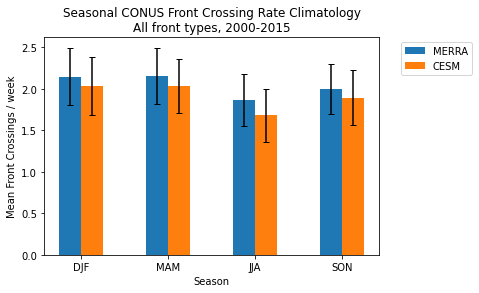

In [75]:
# example bar chart using function above comparing two datasets

filepath1 = '/glade/work/kdagon/FrontDetector/MERRAOutputs/'
ratesfile1 = 'merra_cesm_fronts_2000-2015_frontRates_viaPolylines_customgrid.nc'
gridtype1 = 'MERRA'
label1 = gridtype1

filepath2 = '/glade/work/kdagon/FrontDetector/CESMOutputs/'
ratesfile2 = 'cesm_fronts_2000-2015_frontRates_viaPolylines_customgrid.nc'
gridtype2 = 'MERRA'
label2 = 'CESM'

timerange='2000-2015'

srates_clim_CONUS_barplot(filepath1, ratesfile1, gridtype1, label1, filepath2, ratesfile2, gridtype2, label2, timerange)

### Standardize the plotting to be able to take dictionaries of filepaths and ratesfiles

In [76]:
def srates_clim_CONUS_dict_barplot(filepaths, ratesfiles, timerange):
    
    # set up storage arrays
    spatial = []
    mean = []
    std = []
    labels=[]
    
    # loop over ratesfiles
    for i,r in enumerate(ratesfiles):
        
        # assign a label for plotting
        labels.append(r)
        
        # assign filepath, gridtype based on string matching
        if "CSB" in r:
            f = filepaths["CSB"]
            g = "MERRA"          
        elif "MERRA" in r:
            f = filepaths["MERRA"]
            if "poly" in r:
                g = "MERRA"
            elif "OH" in r:
                g = "CESM"
        elif "CESM" in r:
            f = filepaths["CESM"]
            if "poly" in r:
                g = "MERRA"
            elif "OH" in r:
                g = "CESM"
            
        # call processing function    
        sp, spstd, m, sd = srates_clim_CONUS(path=f, file=ratesfiles[r], grid=g)
        spatial.append(sp)
        mean.append(m)
        std.append(sd)
    
    # set up plot
    fig, ax = plt.subplots(figsize=(15,10))
    
    # number of bars per xlabel
    nbars=len(ratesfiles)
    # width
    w = 0.75/nbars
    
    # set up xlabels
    xlabels = ['DJF', 'MAM', 'JJA', 'SON']
    nseason = len(xlabels)
    x = np.arange(nseason)  # the label locations

    # position based on current iteration
    for i in range(nbars):
        position = x + (w*(1-nbars)/2) + i*w
        ax.bar(position, (mean[i]*7)[:,4], yerr=(std[i]*7)[:,4], width=w, label=labels[i], capsize=3)
    
    ax.set_title('Seasonal CONUS Front Crossing Rate Climatology\nAll front types, '+timerange, fontsize=20)
    ax.set_ylabel('Mean Front Crossings / week', fontsize=15)
    ax.set_xlabel('Season', fontsize=15)
    ax.set_xticks(x)
    ax.set_xticklabels(xlabels, fontsize=12)
    plt.yticks(fontsize=12)

    ax.legend(bbox_to_anchor=(1.05, 1), fontsize=12);
    #plt.savefig('../figures/toSCP/compare_srates_clim_CONUS_mean_wk_stdev.png', bbox_inches='tight')

In [79]:
def srates_clim_CONUS_dict_pcolorplot(filepaths, ratesfiles, timerange):
    
    # set up storage arrays
    spatial = []
    mean = []
    std = []
    labels=[]
    
    # loop over ratesfiles
    for i,r in enumerate(ratesfiles):
        
        # assign a label for plotting
        labels.append(r)
        
        # assign filepath, gridtype based on string matching
        if "CSB" in r:
            f = filepaths["CSB"]
            g = "MERRA"          
        elif "MERRA" in r:
            f = filepaths["MERRA"]
            if "poly" in r:
                g = "MERRA"
            elif "OH" in r:
                g = "CESM"
        elif "CESM" in r:
            f = filepaths["CESM"]
            if "poly" in r:
                g = "MERRA"
            elif "OH" in r:
                g = "CESM"
            
        # call processing function    
        sp, spstd, m, sd = srates_clim_CONUS(path=f, file=ratesfiles[r], grid=g)
        spatial.append(sp)
        mean.append(m)
        std.append(sd)
    
    # set up plots by season type
    ncols=len(ratesfiles)
    seastrings = ('DJF', 'MAM', 'JJA', 'SON')
    nsea = len(seastrings)
    fig, axs = plt.subplots(nsea, ncols, figsize=(40,10), subplot_kw={'projection': ccrs.PlateCarree()})

    # discrete colormap
    cmap=plt.cm.get_cmap('Greens', 8)
    
    # loop over ratesfiles
    for j in range(ncols):

        # loop over seasons
        for i in range(nsea):
            if i == 0:
                axs[i,j].set_title(labels[j], fontsize=20) 
            field, lon = add_cyclic_point((spatial[j]*7)[i,4,:,:], coord=spatial[j].lon)
            lat = spatial[j].lat
            cf = axs[i,j].pcolor(lon, lat, field, cmap=cmap, vmin=0, vmax=4, transform=ccrs.PlateCarree()) # trying to get rid of the white border, does slow down a bit
            axs[i,j].coastlines()
            axs[i,j].add_feature(cfeature.BORDERS)
            if j == 0:
                axs[i,j].set_ylabel(seastrings[i], fontsize=20)
                axs[i,j].set_yticks([])
                fig.suptitle('Seasonal Front Climatology, '+timerange, fontsize=25, y=0.94)
    
    cb_ax = fig.add_axes([0.26, 0.08, 0.5, 0.02])
    norm = mpl.colors.Normalize(vmin=0, vmax=4)
    cb1 = mpl.colorbar.ColorbarBase(cb_ax, cmap, norm=norm, orientation='horizontal')
    cb1.ax.set_xlabel('Fronts per week', fontsize=20)
    cb1.ax.tick_params(labelsize=15)

    plt.subplots_adjust(wspace=0.05, hspace=0)
    #plt.savefig('../figures/toSCP/compare_srates_clim_CONUS.png', bbox_inches='tight')

In [78]:
# create some dictionaries for comparing multiple datasets
filepaths = {
    "CSB": "/glade/work/kdagon/ML-extremes/data/CODSUS/MERRA2/", 
    "MERRA": "/glade/work/kdagon/FrontDetector/MERRAOutputs/",
    "CESM": "/glade/work/kdagon/FrontDetector/CESMOutputs/"
}

# some of these have longer time period variants, sticking to 2003-2015 for consistency
ratesfiles = {
    "CSB_masked": "codsus_masked_frontRates_2003-2015.nc",
    "CSB_unmasked": "codsus_frontRates_2003-2015.nc",
    "MERRA_2D_poly": "merra_fronts_2003-2015_frontRates_viaPolylines_customgrid.nc",
    "MERRA_2D_OH": "merra_frontRates_2003-2015.nc",
    "MERRA_3D_poly": "merra_cesm_fronts_2003-2015_frontRates_viaPolylines_customgrid.nc",
    "MERRA_3D_OH": "merra_cesm_frontRates_2003-2015.nc",
    "CESM_poly": "cesm_fronts_2003-2015_frontRates_viaPolylines_customgrid.nc",
    "CESM_OH": "cesm_frontRates_2003-2015.nc"
}

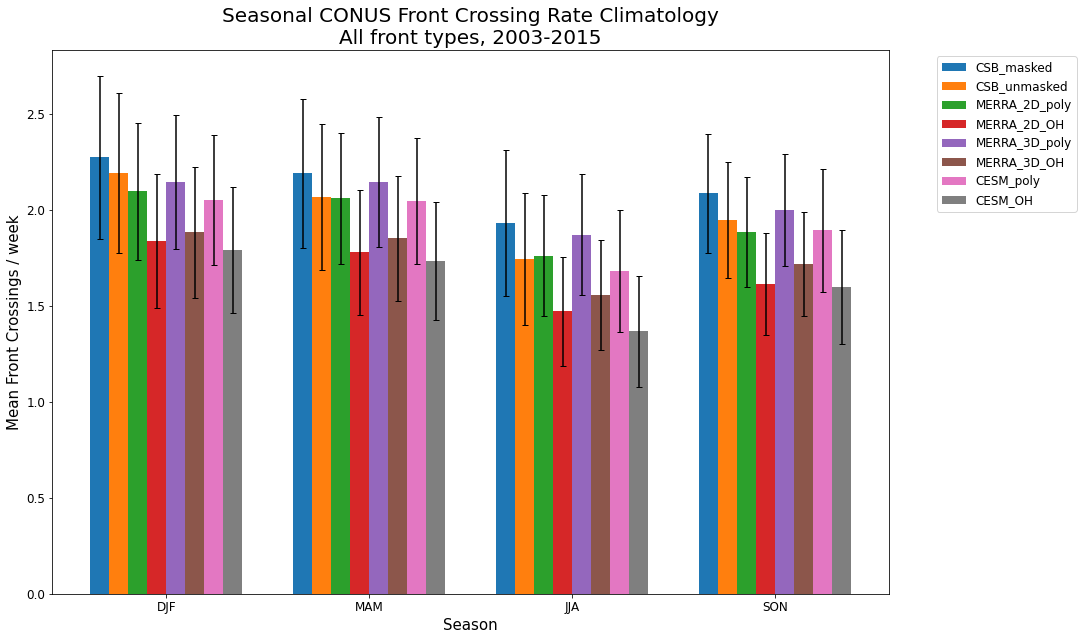

In [80]:
timerange = '2003-2015'

srates_clim_CONUS_dict_barplot(filepaths, ratesfiles, timerange)

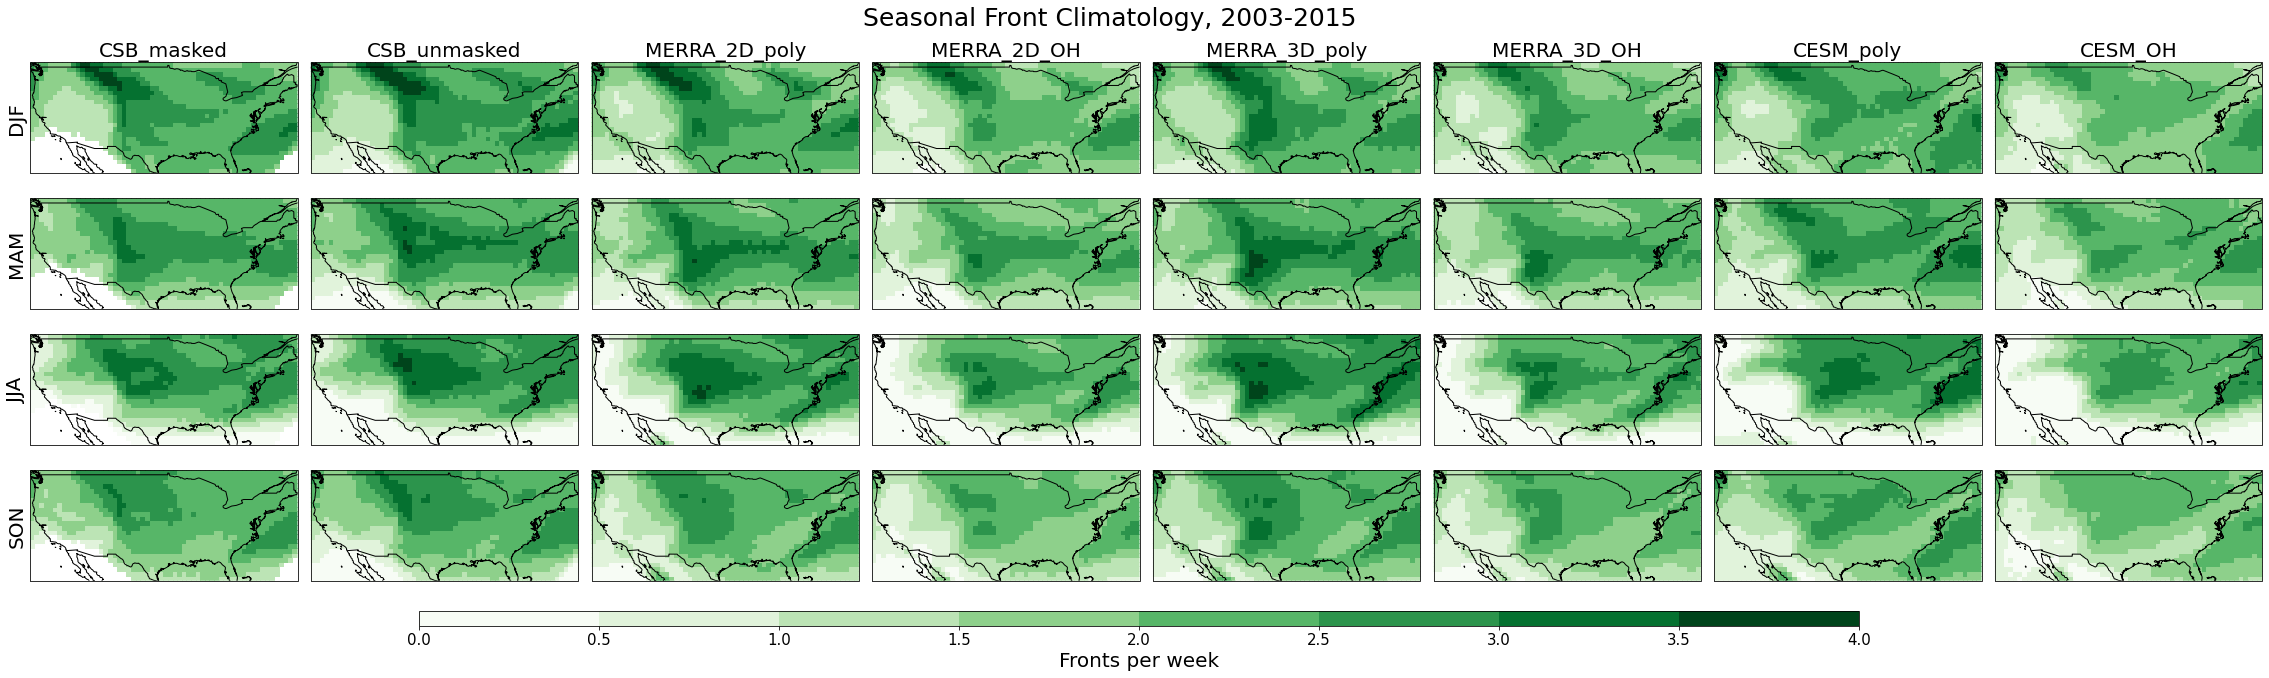

In [81]:
srates_clim_CONUS_dict_pcolorplot(filepaths, ratesfiles, timerange)

### TO DO: spatial difference plots? 

## Timeseries anomaly plots (see B&K Fig 10)

In [82]:
merra_cesm_rates_fronts = xr.open_dataset(merra_filepath+merra_cesm_rates_file)

In [83]:
merra_cesm_rates_fronts.monthly_rate_anomaly.groupby('months.year')

DataArrayGroupBy, grouped over 'year' 
16 groups with labels 2000, 2001, 2002, ..., 2014, 2015.

In [84]:
merra_cesm_rates_fronts.monthly_rate_anomaly.months

<xarray.DataArray 'months' (months: 192)>
array(['2000-01-15T00:00:00.000000000', '2000-02-15T00:00:00.000000000',
       '2000-03-15T00:00:00.000000000', '2000-04-15T00:00:00.000000000',
       '2000-05-15T00:00:00.000000000', '2000-06-15T00:00:00.000000000',
       '2000-07-15T00:00:00.000000000', '2000-08-15T00:00:00.000000000',
       '2000-09-15T00:00:00.000000000', '2000-10-15T00:00:00.000000000',
       '2000-11-15T00:00:00.000000000', '2000-12-15T00:00:00.000000000',
       '2001-01-15T00:00:00.000000000', '2001-02-15T00:00:00.000000000',
       '2001-03-15T00:00:00.000000000', '2001-04-15T00:00:00.000000000',
       '2001-05-15T00:00:00.000000000', '2001-06-15T00:00:00.000000000',
       '2001-07-15T00:00:00.000000000', '2001-08-15T00:00:00.000000000',
       '2001-09-15T00:00:00.000000000', '2001-10-15T00:00:00.000000000',
       '2001-11-15T00:00:00.000000000', '2001-12-15T00:00:00.000000000',
       '2002-01-15T00:00:00.000000000', '2002-02-15T00:00:00.000000000',
       '2002-03-15T00:00:00.000000000', '2002-04-15T00:00:00.000000000',
       '2002-05-15T00:00:00.000000000', '2002-06-15T00:00:00.000000000',
       '2002-07-15T00:00:00.000000000', '2002-08-15T00:00:00.000000000',
       '2002-09-15T00:00:00.000000000', '2002-10-15T00:00:00.000000000',
       '2002-11-15T00:00:00.000000000', '2002-12-15T00:00:00.000000000',
       '2003-01-15T00:00:00.000000000', '2003-02-15T00:00:00.000000000',
       '2003-03-15T00:00:00.000000000', '2003-04-15T00:00:00.000000000',
       '2003-05-15T00:00:00.000000000', '2003-06-15T00:00:00.000000000',
       '2003-07-15T00:00:00.000000000', '2003-08-15T00:00:00.000000000',
       '2003-09-15T00:00:00.000000000', '2003-10-15T00:00:00.000000000',
       '2003-11-15T00:00:00.000000000', '2003-12-15T00:00:00.000000000',
       '2004-01-15T00:00:00.000000000', '2004-02-15T00:00:00.000000000',
       '2004-03-15T00:00:00.000000000', '2004-04-15T00:00:00.000000000',
       '2004-05-15T00:00:00.000000000', '2004-06-15T00:00:00.000000000',
       '2004-07-15T00:00:00.000000000', '2004-08-15T00:00:00.000000000',
       '2004-09-15T00:00:00.000000000', '2004-10-15T00:00:00.000000000',
       '2004-11-15T00:00:00.000000000', '2004-12-15T00:00:00.000000000',
       '2005-01-15T00:00:00.000000000', '2005-02-15T00:00:00.000000000',
       '2005-03-15T00:00:00.000000000', '2005-04-15T00:00:00.000000000',
       '2005-05-15T00:00:00.000000000', '2005-06-15T00:00:00.000000000',
       '2005-07-15T00:00:00.000000000', '2005-08-15T00:00:00.000000000',
       '2005-09-15T00:00:00.000000000', '2005-10-15T00:00:00.000000000',
       '2005-11-15T00:00:00.000000000', '2005-12-15T00:00:00.000000000',
       '2006-01-15T00:00:00.000000000', '2006-02-15T00:00:00.000000000',
       '2006-03-15T00:00:00.000000000', '2006-04-15T00:00:00.000000000',
       '2006-05-15T00:00:00.000000000', '2006-06-15T00:00:00.000000000',
       '2006-07-15T00:00:00.000000000', '2006-08-15T00:00:00.000000000',
       '2006-09-15T00:00:00.000000000', '2006-10-15T00:00:00.000000000',
       '2006-11-15T00:00:00.000000000', '2006-12-15T00:00:00.000000000',
       '2007-01-15T00:00:00.000000000', '2007-02-15T00:00:00.000000000',
       '2007-03-15T00:00:00.000000000', '2007-04-15T00:00:00.000000000',
       '2007-05-15T00:00:00.000000000', '2007-06-15T00:00:00.000000000',
       '2007-07-15T00:00:00.000000000', '2007-08-15T00:00:00.000000000',
       '2007-09-15T00:00:00.000000000', '2007-10-15T00:00:00.000000000',
       '2007-11-15T00:00:00.000000000', '2007-12-15T00:00:00.000000000',
       '2008-01-15T00:00:00.000000000', '2008-02-15T00:00:00.000000000',
       '2008-03-15T00:00:00.000000000', '2008-04-15T00:00:00.000000000',
       '2008-05-15T00:00:00.000000000', '2008-06-15T00:00:00.000000000',
       '2008-07-15T00:00:00.000000000', '2008-08-15T00:00:00.000000000',
       '2008-09-15T00:00:00.000000000', '2008-10-15T00:00:00.000000000',
       '2008-11-15T00:00:00.000000000', '2008-12-15T00:00:00.000000000',
       '2009-01-

### Function to calculate monthly rate anomalies

In [85]:
# function for calculating monthly rate anomalies over CONUS (spatial field, spatial mean)
def mrates_anom_CONUS(path, file, grid):

    # read in files
    rates_fronts = xr.open_dataset(path+file)
    
    # process monthly rate anomaly
    mrates_anom = rates_fronts.monthly_rate_anomaly
    
    # check gridtype
    if grid=='CESM':
        mrates_anom_CONUS = mrates_anom.sel(lat=slice(26,50), lon=slice(235,292)) # CESM grid lons
    elif grid=='MERRA':
        mrates_anom_CONUS = mrates_anom.sel(lat=slice(26,50), lon=slice(-125, -68)) # MERRA2 grid lons for rates calculated via polylines
    
       
    # average over CONUS
    weights = np.cos(np.deg2rad(mrates_anom_CONUS.lat))
    weights.name = "weights"
    mrates_anom_CONUS_weighted = mrates_anom_CONUS.weighted(weights)
    mrates_anom_CONUS_weighted_mean = mrates_anom_CONUS_weighted.mean(("lon","lat"))
        
    return(mrates_anom_CONUS, mrates_anom_CONUS_weighted_mean)

In [86]:
# example using function above comparing two datasets

filepath1 = '/glade/work/kdagon/FrontDetector/MERRAOutputs/'
ratesfile1 = 'merra_cesm_fronts_2000-2015_frontRates_viaPolylines_customgrid.nc'
gridtype1 = 'MERRA'

filepath2 = '/glade/work/kdagon/FrontDetector/CESMOutputs/'
ratesfile2 = 'cesm_fronts_2000-2015_frontRates_viaPolylines_customgrid.nc'
gridtype2 = 'MERRA'

In [87]:
spatial1, mean1 = mrates_anom_CONUS(path=filepath1, file=ratesfile1, grid=gridtype1)
spatial2, mean2 = mrates_anom_CONUS(path=filepath2, file=ratesfile2, grid=gridtype2)

In [88]:
mean1.months

<xarray.DataArray 'months' (months: 192)>
array(['2000-01-15T00:00:00.000000000', '2000-02-15T00:00:00.000000000',
       '2000-03-15T00:00:00.000000000', '2000-04-15T00:00:00.000000000',
       '2000-05-15T00:00:00.000000000', '2000-06-15T00:00:00.000000000',
       '2000-07-15T00:00:00.000000000', '2000-08-15T00:00:00.000000000',
       '2000-09-15T00:00:00.000000000', '2000-10-15T00:00:00.000000000',
       '2000-11-15T00:00:00.000000000', '2000-12-15T00:00:00.000000000',
       '2001-01-15T00:00:00.000000000', '2001-02-15T00:00:00.000000000',
       '2001-03-15T00:00:00.000000000', '2001-04-15T00:00:00.000000000',
       '2001-05-15T00:00:00.000000000', '2001-06-15T00:00:00.000000000',
       '2001-07-15T00:00:00.000000000', '2001-08-15T00:00:00.000000000',
       '2001-09-15T00:00:00.000000000', '2001-10-15T00:00:00.000000000',
       '2001-11-15T00:00:00.000000000', '2001-12-15T00:00:00.000000000',
       '2002-01-15T00:00:00.000000000', '2002-02-15T00:00:00.000000000',
       '2002-03-15T00:00:00.000000000', '2002-04-15T00:00:00.000000000',
       '2002-05-15T00:00:00.000000000', '2002-06-15T00:00:00.000000000',
       '2002-07-15T00:00:00.000000000', '2002-08-15T00:00:00.000000000',
       '2002-09-15T00:00:00.000000000', '2002-10-15T00:00:00.000000000',
       '2002-11-15T00:00:00.000000000', '2002-12-15T00:00:00.000000000',
       '2003-01-15T00:00:00.000000000', '2003-02-15T00:00:00.000000000',
       '2003-03-15T00:00:00.000000000', '2003-04-15T00:00:00.000000000',
       '2003-05-15T00:00:00.000000000', '2003-06-15T00:00:00.000000000',
       '2003-07-15T00:00:00.000000000', '2003-08-15T00:00:00.000000000',
       '2003-09-15T00:00:00.000000000', '2003-10-15T00:00:00.000000000',
       '2003-11-15T00:00:00.000000000', '2003-12-15T00:00:00.000000000',
       '2004-01-15T00:00:00.000000000', '2004-02-15T00:00:00.000000000',
       '2004-03-15T00:00:00.000000000', '2004-04-15T00:00:00.000000000',
       '2004-05-15T00:00:00.000000000', '2004-06-15T00:00:00.000000000',
       '2004-07-15T00:00:00.000000000', '2004-08-15T00:00:00.000000000',
       '2004-09-15T00:00:00.000000000', '2004-10-15T00:00:00.000000000',
       '2004-11-15T00:00:00.000000000', '2004-12-15T00:00:00.000000000',
       '2005-01-15T00:00:00.000000000', '2005-02-15T00:00:00.000000000',
       '2005-03-15T00:00:00.000000000', '2005-04-15T00:00:00.000000000',
       '2005-05-15T00:00:00.000000000', '2005-06-15T00:00:00.000000000',
       '2005-07-15T00:00:00.000000000', '2005-08-15T00:00:00.000000000',
       '2005-09-15T00:00:00.000000000', '2005-10-15T00:00:00.000000000',
       '2005-11-15T00:00:00.000000000', '2005-12-15T00:00:00.000000000',
       '2006-01-15T00:00:00.000000000', '2006-02-15T00:00:00.000000000',
       '2006-03-15T00:00:00.000000000', '2006-04-15T00:00:00.000000000',
       '2006-05-15T00:00:00.000000000', '2006-06-15T00:00:00.000000000',
       '2006-07-15T00:00:00.000000000', '2006-08-15T00:00:00.000000000',
       '2006-09-15T00:00:00.000000000', '2006-10-15T00:00:00.000000000',
       '2006-11-15T00:00:00.000000000', '2006-12-15T00:00:00.000000000',
       '2007-01-15T00:00:00.000000000', '2007-02-15T00:00:00.000000000',
       '2007-03-15T00:00:00.000000000', '2007-04-15T00:00:00.000000000',
       '2007-05-15T00:00:00.000000000', '2007-06-15T00:00:00.000000000',
       '2007-07-15T00:00:00.000000000', '2007-08-15T00:00:00.000000000',
       '2007-09-15T00:00:00.000000000', '2007-10-15T00:00:00.000000000',
       '2007-11-15T00:00:00.000000000', '2007-12-15T00:00:00.000000000',
       '2008-01-15T00:00:00.000000000', '2008-02-15T00:00:00.000000000',
       '2008-03-15T00:00:00.000000000', '2008-04-15T00:00:00.000000000',
       '2008-05-15T00:00:00.000000000', '2008-06-15T00:00:00.000000000',
       '2008-07-15T00:00:00.000000000', '2008-08-15T00:00:00.000000000',
       '2008-09-15T00:00:00.000000000', '2008-10-15T00:00:00.000000000',
       '2008-11-15T00:00:00.000000000', '2008-12-15T00:00:00.000000000',
       '2009-01-

In [89]:
mean2.months

<xarray.DataArray 'months' (months: 192)>
array([cftime.DatetimeNoLeap(2000, 1, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2000, 2, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2000, 3, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2000, 4, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2000, 5, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2000, 6, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2000, 7, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2000, 8, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2000, 9, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2000, 10, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2000, 11, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2000, 12, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2001, 1, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2001, 2, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2001, 3, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2001, 4, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2001, 5, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2001, 6, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2001, 7, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2001, 8, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2001, 9, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2001, 10, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2001, 11, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2001, 12, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2002, 1, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2002, 2, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2002, 3, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2002, 4, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2002, 5, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2002, 6, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2002, 7, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2002, 8, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2002, 9, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2002, 10, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2002, 11, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2002, 12, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2003, 1, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2003, 2, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2003, 3, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2003, 4, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2003, 5, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2003, 6, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2003, 7, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2003, 8, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2003, 9, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2003, 10, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2003, 11, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2003, 12, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2004, 1, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2004, 2, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2004, 3, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2004, 4, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2004, 5, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2004, 6, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2004, 7, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2004, 8, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2004, 9, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2004, 10, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2004, 11, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2004, 12, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 1, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 2, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 3, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 4, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 5, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 6, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 7, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 8, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 9, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 10, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 11, 15, 0, 0, 0, 0),
       cftime.DatetimeNoLeap(2005, 1

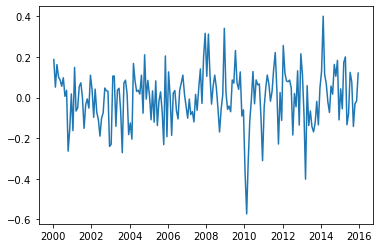

In [91]:
plt.plot(mean1.months, (mean1*7)[:,4], label=label1, color='C0');

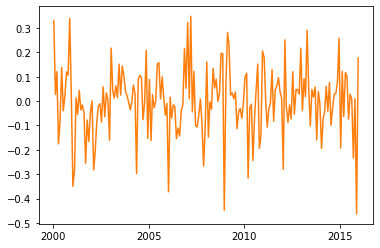

In [92]:
plt.plot(mean2.months, (mean2*7)[:,4], label=label2, color='C1');

### Need to standardize time conventions to get these to show up on the same plot
Different time conventions for MERRA (datetime) and CESM (cftime)

In [93]:
# try converting cftime (CESM) to datetime
datetimeindex = mean2.indexes['months'].to_datetimeindex()
mean2['months'] = datetimeindex

<ipython-input-93-ec15a83bfc65>:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = mean2.indexes['months'].to_datetimeindex()


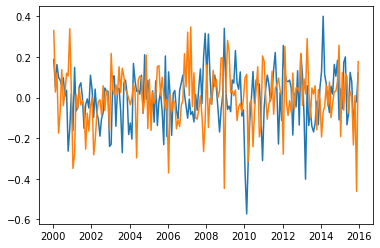

In [94]:
plt.plot(mean1.months, (mean1*7)[:,4], label=label1, color='C0')
plt.plot(mean2.months, (mean2*7)[:,4], label=label2, color='C1');

the above worked but as the warning indicated, the calendars are slightly off (CESM is no-leap) so that may impact visualization\
but they are already monthly anomalies so leap days have likely already been factored in...

### Function to plot two timeseries

In [96]:
# function for plotting timeseries comparing two datasets over a specified time period
def mrates_anom_CONUS_ts(filepath1, ratesfile1, gridtype1, label1, filepath2, ratesfile2, gridtype2, label2, timerange):
    
    # call processing function
    spatial1, mean1 = mrates_anom_CONUS(path=filepath1, file=ratesfile1, grid=gridtype1)
    spatial2, mean2 = mrates_anom_CONUS(path=filepath2, file=ratesfile2, grid=gridtype2)
    
    # set up plot
    fig, ax = plt.subplots(figsize=(10,8))

    # TO DO: label years at first month of each year, given data input?
    #labels = np.arange(2000,2015)  # the labels
    
    # standarize time indices (this assumes mean2 is cftime, need to build in some logic)
    datetimeindex = mean2.indexes['months'].to_datetimeindex()
    mean2['months'] = datetimeindex

    ax.plot(mean1.months, (mean1*7)[:,4], label=label1, color='C0')
    ax.plot(mean2.months, (mean2*7)[:,4], label=label2, color='C1')

    ax.set_title('Monthly CONUS Front Crossing Rate Anomaly\nAll front types, '+timerange)
    ax.set_ylabel('Mean Front Crossing Rate Anomaly / week')
    #ax.set_xlabel('Year')
    #ax.set_xticks(x)
    #ax.set_xticklabels(labels)
    
    date_form = DateFormatter("%Y")
    ax.xaxis.set_major_formatter(date_form)

    ax.legend()
    #plt.savefig('../figures/toSCP/'+label1+'_'+label2+'_srates_clim_CONUS_mean_wk_stdev.png', bbox_inches='tight')

<ipython-input-96-5b2c8f3fbe92>:15: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = mean2.indexes['months'].to_datetimeindex()


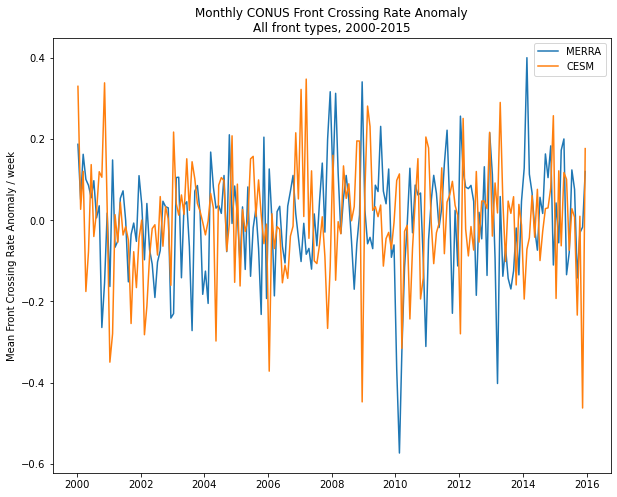

In [97]:
# example timeseries using functions above comparing two datasets

filepath1 = '/glade/work/kdagon/FrontDetector/MERRAOutputs/'
ratesfile1 = 'merra_cesm_fronts_2000-2015_frontRates_viaPolylines_customgrid.nc'
gridtype1 = 'MERRA'
label1 = gridtype1

filepath2 = '/glade/work/kdagon/FrontDetector/CESMOutputs/'
ratesfile2 = 'cesm_fronts_2000-2015_frontRates_viaPolylines_customgrid.nc'
gridtype2 = 'MERRA'
label2 = 'CESM'

timerange='2000-2015'

mrates_anom_CONUS_ts(filepath1, ratesfile1, gridtype1, label1, filepath2, ratesfile2, gridtype2, label2, timerange)

### Regression lines

In [98]:
mean1.polyfit

AttributeError: 'DataArray' object has no attribute 'polyfit'

## TO DO: update xarray version to use polyfit (PEx kernel?)